<h2>Task - 1 </h2>

In [22]:
!pip install scipy==1.8.1
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.1 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=0fb22982ca7df4cc5047f3e2e7f4822a28672f9869f1262c843effa4c474b88c
  Stored in directory: /root/.cache/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji


In [2]:
from google.colab import files
file_data = files.upload()

Saving Keyword_data - Keyword_data.csv to Keyword_data - Keyword_data.csv


In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_keyword = pd.read_csv('Keyword_data - Keyword_data.csv')
df_keyword.shape

(66, 13)

Clean the Dataset by dropping null columns

In [5]:
df_keyword.dropna(how = "all", inplace=True)
df_keyword.reset_index(drop=True)
# df_keyword = df_keyword.drop(columns = {'index'})
df_keyword

Title  \
0                                              Feb/03   
2   Meta-Analyses of Financial Performance and Equ...   
3   Home Country Environments, Corporate Diversifi...   
4   Safeguarding Investments in Asymmetric Interor...   
5   Managerialist and Human Capital Explanations f...   
6   Bidding Wars Over R&D-Intensive Firms: Knowled...   
7   When “The Show Must Go On”: Surface Acting and...   
8   Relationships among Supervisors' and Subordina...   
9   Punctuated Equilibrium and Linear Progression:...   
11                                             Apr/03   
13  The Relationship between Overconfidence and th...   
14  Governance Through Ownership: Centuries of Pra...   
15  Strategic Satisficing? A Behavioral-Agency The...   
16  Exploring the Agency Consequences of Ownership...   
17  Institutional Ownership Differences and Intern...   
18  Ownership Structures and R&D Investments of U....   
19  The Determinants of Executive Compensation in ...   
20  Ownership Structure, Expropriation, and Perfor...   
21  CEO Stock Options: The Silent Dimension of Own...   
23                                             Jun/03   
25  Assessing Creativity in Hollywood Pitch Meetin...   
26  Reactions to Perceived Inequity in U.S. and Du...   
27  The Impact of Community Violence and an Organi...   
28  Explaining New CEO Origin: Firm Versus Industr...   
29  Do High Job Demands Increase Intrinsic Motivat...   
30  Organizational Hiring Patterns, Interfirm Netw...   
31  The Effects of Centrifugal and Centripetal For...   
32     A Social Capital Model of High-Growth Ventures   
34                                             Aug/03   
36  Transforming Work-Family Conflict into Commitm...   
37  Advocacy, Performance, and Threshold Influence...   
38  Managing from the Boundary: The Effective Lead...   
39  Team Member Functional Background and Involvem...   
40  Happy Together? How Using Nonstandard Workers ...   
41  Interpersonal Aggression in Work Groups: Socia...   
42  Share Price Reactions to Work-Family Initiativ...   
43  The Role of Human Capital in Postacquisition C...   
45                                             Oct/03   
47  How Much Should I Give and How Often? The Effe...   
48  Self-Concordance at Work: Toward Understanding...   
49  Cooperation, Competition, and Team Performance...   
50  The Impact Of Expectations On Newcomer Perform...   
51  THe Effects of Discontinuous Change on Latent ...   
52  Employee Creativity in Taiwan: An Application ...   
53  Media Legitimation Effects in the Market for I...   
54  Giving Money to Get Money: How CEO Stock Optio...   
56                                             Dec/03   
58  A Behavioral Theory of R&D Expenditures and In...   
59  Transformational Leadership, Conservation, and...   
60  Informational Dissimilarity and Organizational...   
61  Subsidiary Staffing in Multinational Enterpris...   
62  Strategic Human Resource Practices, Top Manage...   
63  Compensation Policy and Organizational Perform...   
64  Functional Background Identity, Diversity, and...   
65  A Customer Interaction Approach to Strategy an...   

                                           Keyword 1  \
0                                                NaN   
2                                             EQUITY   
3                        DIVERSIFICATION in industry   
4                      INTERORGANIZATIONAL relations   
5                             EXECUTIVE compensation   
6                               KNOWLEDGE management   
7                              EMOTIONS (Psychology)   
8                                        SUPERVISORS   
9                               INDUSTRIAL relations   
11                                               NaN   
13                                   DECISION making   
14                              CORPORATE governance   
15                                        EXECUTIVES   
16                 FAMILY-owned business enterprises   
17             

In [6]:
keywords_df = df_keyword.iloc[:,1:]
keywords_df

Keyword 1  \
0                                                NaN   
2                                             EQUITY   
3                        DIVERSIFICATION in industry   
4                      INTERORGANIZATIONAL relations   
5                             EXECUTIVE compensation   
6                               KNOWLEDGE management   
7                              EMOTIONS (Psychology)   
8                                        SUPERVISORS   
9                               INDUSTRIAL relations   
11                                               NaN   
13                                   DECISION making   
14                              CORPORATE governance   
15                                        EXECUTIVES   
16                 FAMILY-owned business enterprises   
17                           INSTITUTIONAL investors   
18                            RESEARCH & development   
19                 FAMILY-owned business enterprises   
20                                          PROPERTY   
21                                     STOCK options   
23                                               NaN   
25                                MANAGEMENT science   
26                     INTERORGANIZATIONAL relations   
27                           AGGRESSION (Psychology)   
28                          CHIEF executive officers   
29                                    MENTAL fatigue   
30                              PERSONNEL management   
31                                PRODUCT management   
32                        SOCIAL capital (Sociology)   
34                                               NaN   
36                           ORGANIZATIONAL behavior   
37                                      NEW products   
38                                        LEADERSHIP   
39                            TEAMS in the workplace   
40                                      LABOR supply   
41                            EMPLOYEES -- Attitudes   
42                                     WORK & family   
43                                     HUMAN capital   
45                                               NaN   
47                                     SOCIAL status   
48                                        LEADERSHIP   
49                               EMPLOYEE motivation   
50                            TEAMS in the workplace   
51                             ORGANIZATIONAL change   
52                                  CREATIVE ability   
53                         GOING public (Securities)   
54                                     STOCK options   
56                                               NaN   
58                           ORGANIZATIONAL behavior   
59                                        LEADERSHIP   
60                           ORGANIZATIONAL behavior   
61  INTERNATIONAL business enterprises -- Management   
62                              PERSONNEL management   
63                           COMPENSATION management   
64                            CROSS-functional teams   
65                  SERVICE industries -- Management   

                             Keyword 2                       Keyword 3  \
0                                  NaN                             NaN   
2             ORGANIZATIONAL sociology                     PERFORMANCE   
3                    BUSINESS planning           PERFORMANCE standards   
4                 INTERGROUP relations          BUSINESS communication   
5                                WAGES                   HUMAN capital   
6     INFORMATION resources management  MANAGEMENT information systems   
7              INTERPERSONAL relations             STRESS (Psychology)   
8                              JUSTICE             CONFLICT management   
9                   MANAGEMENT science                 DECISION theory   
11                                 NaN                             NaN   
13                          EXECUTIVES           INDUSTRIAL management   
14               I

Find the Unique Keywords from the dataframe and create a List

In [7]:
list_kw = []
keywords_df.apply(lambda x:list_kw.append(x.values), axis = 0)
list_kw = list(set(np.concatenate(list_kw).flat))
len(list_kw)
unique_val = [element for element in list_kw if str(element) != "nan"]
print("Output list is:", unique_val)

Output list is: ['RESEARCH & development', 'CONDUCT of life', 'HUMAN capital -- Management', 'STEWARDS', 'AGGRESSION (Psychology)', 'VIOLENCE in the workplace', 'PROBLEM solving', 'SOCIAL exchange', 'BOARDS of directors', 'CROSS-functional teams', 'RESOURCE allocation', 'SUPERVISORS', 'RISK', 'HIGH technology industries', 'INDUSTRIAL management', 'CAPITALISTS & financiers', 'STOCK options', 'MUNICIPAL corporations', 'MARKETING', 'SERVICE industries -- Management', 'ENTREPRENEURSHIP', 'UNITED States -- National Guard', 'INDIVIDUAL differences', 'BUSINESS communication', 'LABOR supply', 'STOCKS (Finance)', 'INDUSTRIAL relations', 'ORGANIZATIONAL behavior', 'GLOBALIZATION', 'PRODUCT design', 'SUCCESS in business', 'SOCIAL influence', 'INDUSTRIAL efficiency', 'DELEGATION of authority', 'DECISION making', 'TECHNOLOGICAL innovations', 'VIOLENCE', 'CONFLICT management', 'WOMEN employees', 'MASS media', 'JOB satisfaction', 'STOCKS (Finance) -- Prices', 'RISK management in business', 'OPTIONS (

In [8]:
#convert the dataframe into dict values by considering first column as keys
mapped_list = df_keyword.set_index('Title').agg(list, axis=1).to_dict()
mapped_list

{'Feb/03': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 'Meta-Analyses of Financial Performance and Equity: Fusion or Confusion?': ['EQUITY',
  'ORGANIZATIONAL sociology',
  'PERFORMANCE',
  'META-analysis',
  'PSYCHOMETRICS',
  'ORGANIZATIONAL research',
  'FINANCIAL performance',
  'AGENCY theory',
  'ORGANIZATIONAL effectiveness',
  'ORGANIZATIONAL behavior',
  'CORPORATE governance',
  nan],
 'Home Country Environments, Corporate Diversification Strategies, and Firm Performance': ['DIVERSIFICATION in industry',
  'BUSINESS planning',
  'PERFORMANCE standards',
  'EMPLOYEES -- Rating of',
  'CORPORATE culture',
  'STRATEGIC planning',
  'ORGANIZATIONAL effectiveness',
  'MANAGEMENT science',
  'MANAGEMENT research',
  'PRODUCT management',
  nan,
  nan],
 'Safeguarding Investments in Asymmetric Interorganizational Relationships: Theory and Evidence': ['INTERORGANIZATIONAL relations',
  'INTERGROUP relations',
  'BUSINESS communication',
  'INVESTMENTS',
  'SUPPLY c

2. Create the adjacency matrix

In [9]:
#find the lengthe of unique values
len_keys = len(unique_val) 
#create the nxn zeros matrix with length of unique keywords 
adj_matrix = np.zeros((len_keys, len_keys), dtype = int)

#Creating the adjacency matrix by mapping the unique values with the mapped list
for row in range(0, len_keys):
  for col in range(0, len_keys):
    if row != col :
      if (adj_matrix[row][col] == 0) and (adj_matrix[col][row] == 0) :
        for title in mapped_list.keys():
          if (unique_val[row] in (mapped_list[title])) and (unique_val[col] in (mapped_list[title])):
            adj_matrix[row][col] = adj_matrix[row][col] + 1
            adj_matrix[col][row] = adj_matrix[col][row] + 1 

adj_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0]])

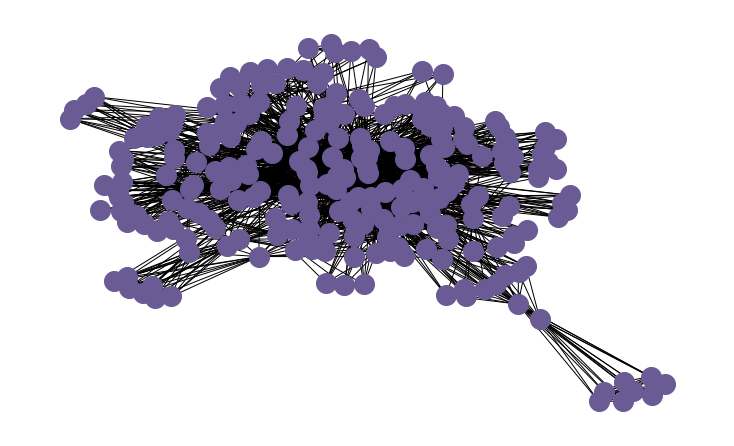

In [16]:
#plotting network graph with the unique keywords and adjacency matrix
network = nx.from_numpy_matrix(adj_matrix, parallel_edges=False,)
plt.figure(3,figsize=(10,6)) 
nx.draw(network,node_color='#6b5b95', node_size=400, font_color='whitesmoke')
plt.show()

In [17]:
#3,4,5 convert the adj matrix to weighted network, degree
print("No of Nodes in the Network ",network.number_of_nodes() )
print("No of Edges in the Network ",network.number_of_edges() )
df_net_degree = pd.DataFrame(network.degree, columns=['No_Of_Nodes', 'No_Of_Degree'])
df_net_degree['Keywords'] = unique_val
df_final_degree = df_net_degree.sort_values(by=['No_Of_Degree'],ascending=False)
#top 10 rows with highest degree
df_final_degree.head(10)

No of Nodes in the Network  248
No of Edges in the Network  2141


No_Of_Nodes  No_Of_Degree                      Keywords
27            27           166       ORGANIZATIONAL behavior
140          140           104  ORGANIZATIONAL effectiveness
100          100           102            MANAGEMENT science
247          247            93          PERSONNEL management
34            34            90               DECISION making
61            61            74      ORGANIZATIONAL structure
238          238            66            STRATEGIC planning
132          132            66      ORGANIZATIONAL sociology
14            14            64         INDUSTRIAL management
138          138            62          CORPORATE governance

In [18]:
#3,4,5 compute the node strength
df_net_strength = pd.DataFrame(network.degree(weight='weight'), columns=['No_Of_Nodes', 'Strength'])
df_net_strength['Keywords'] = unique_val
df_final_strength = df_net_strength.sort_values(by=['Strength'],ascending=False)
#top 10 rows with highest strength
df_final_strength.head(10)

No_Of_Nodes  Strength                      Keywords
27            27       265       ORGANIZATIONAL behavior
140          140       144  ORGANIZATIONAL effectiveness
100          100       136            MANAGEMENT science
247          247       126          PERSONNEL management
34            34       112               DECISION making
61            61       107      ORGANIZATIONAL structure
132          132        96      ORGANIZATIONAL sociology
138          138        85          CORPORATE governance
14            14        84         INDUSTRIAL management
238          238        80            STRATEGIC planning

In [19]:
#6 compute all pairs of weight
lis = []
for i in range(0,len(unique_val)):
  for j in range(0,len(unique_val)):
    lis.append([df_net_strength['Keywords'][i], df_net_strength['Keywords'][j], adj_matrix[i][j]])
df_net_weights = pd.DataFrame(lis, columns =['keyword1', 'keyword2', 'Weights'], dtype = float) 
df_final_weights = df_net_weights.sort_values(by=['Weights'],ascending=False)
#top 10 values from the dataframe
df_final_weights.head(10)

keyword1                      keyword2  Weights
34747  ORGANIZATIONAL effectiveness       ORGANIZATIONAL behavior     11.0
6836        ORGANIZATIONAL behavior  ORGANIZATIONAL effectiveness     11.0
6757        ORGANIZATIONAL behavior      ORGANIZATIONAL structure      9.0
15155      ORGANIZATIONAL structure       ORGANIZATIONAL behavior      9.0
61283          PERSONNEL management       ORGANIZATIONAL behavior      8.0
6943        ORGANIZATIONAL behavior          PERSONNEL management      8.0
6796        ORGANIZATIONAL behavior            MANAGEMENT science      7.0
24827            MANAGEMENT science       ORGANIZATIONAL behavior      7.0
34251          CORPORATE governance       ORGANIZATIONAL behavior      6.0
6730        ORGANIZATIONAL behavior               DECISION making      6.0

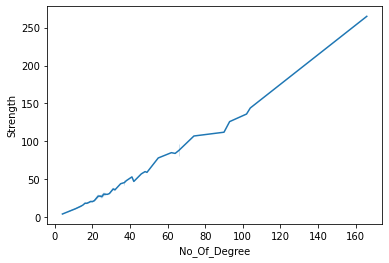

In [20]:
#7. Plot average strength on y-axis and degree on x-axis
sns.lineplot(x=df_net_degree['No_Of_Degree'], y=df_net_strength['Strength'])

In [21]:
#using plotly library
fig = px.line(x=df_net_degree['No_Of_Degree'], y=df_net_strength['Strength'], title='Strength vs Degree')
fig.show()

<h2>Task - 2</h2>

In [184]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from cleantext import clean
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
STOPWORDS = list(set(stopwords.words('english')))
extra_stopwords = ['@','$','.',',','!',"'s",'i','I','&','%','*','"','#','(',')','[',']','{','}','/','?','<','>','`','~','-','_','+','=',' & ',' &','& ','the','3','it','its',"it's",'this','that.','that','...','we','It','yes','no','if','we','If','We',';',':' ' (',')','[',']','{','}','m','t','d']
stop_words = STOPWORDS + extra_stopwords
print(stop_words)

['yours', "you'll", "should've", 'you', 'each', 'aren', 'o', 'such', 'i', 'yourselves', 'but', 'weren', 'there', 't', 'with', 'below', 'itself', 'ma', 'its', 'himself', 'he', 'when', 'll', 'was', 'above', 'or', 'this', 'are', 'than', 'just', 'their', 'myself', 'being', 'having', 'after', 'whom', "you're", 'should', 'those', 'hadn', 'couldn', "haven't", 'it', 'has', 'does', 'nor', "she's", "shouldn't", 'won', 'my', 'wouldn', 'hers', "isn't", 'where', 'some', 'if', 'what', 'off', 'doing', 'herself', 'only', 'mustn', 'didn', 're', 'not', 'y', 'against', "doesn't", 'during', 'while', 'once', 'd', 'will', "couldn't", "hasn't", 'your', 'them', 'needn', 'ain', 'out', 'up', 'we', 'am', 'more', 'me', 'by', 'our', 'all', 'haven', 'shan', 'few', 'too', 'ours', 'in', 'can', 'were', "mustn't", 'before', 'him', 'his', 'm', 'until', "hadn't", "weren't", 's', 'doesn', 'at', 'theirs', 'most', 'of', 'had', "you've", 'any', 'so', "wouldn't", 'that', 'under', 'yourself', 'through', 'is', 'have', 'for', 'd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [185]:

#Mounting files from google drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/FDA_Project_3/tweet_datasets
#Changing directory for files and converting the file names to list
dir = '/content/drive/MyDrive/FDA_Project_3/tweet_datasets'
#It gives us the list of all the files present in the current directory
files_dir_list = sorted(os.listdir(dir))
print(pd.DataFrame(files_dir_list,columns=['File_Names']))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/FDA_Project_3/tweet_datasets
   File_Names
0    2010.csv
1    2011.csv
2    2012.csv
3    2013.csv
4    2014.csv
5    2015.csv
6    2016.csv
7    2017.csv
8    2018.csv
9    2019.csv
10   2020.csv
11   2021.csv
12   2022.csv


In [186]:
#getting the all years data into one dataframe
df_tweets_tempdata = pd.concat((pd.read_csv(f) for f in files_dir_list), ignore_index=True)
df_tweets_tempdata.head(10)

Unnamed: 0                  id     conversation_id       created_at  \
0         0.0         15434727182         15434727182  1275676317000.0   
1         0.0  152153637639028736  152151847614943233  1325111228000.0   
2         1.0  151809315026636800  151809315026636800  1325029135000.0   
3         2.0  151338939389706242  151338939389706242  1324916990000.0   
4         3.0  151337237429239808  151337237429239808  1324916584000.0   
5         4.0  151327734843445249  151327734843445249  1324914318000.0   
6         5.0  151322293174419456  151322293174419456  1324913020000.0   
7         6.0  151317672217419777  151317672217419777  1324911919000.0   
8         7.0  151151777662779392  151151777662779392  1324872366000.0   
9         8.0  150390624552615937  150390624552615937  1324690893000.0   

                  date  timezone  place  \
0  2010-06-04 18:31:57         0    NaN   
1  2011-12-28 22:27:08         0    NaN   
2  2011-12-27 23:38:55         0    NaN   
3  2011-12-26 16:29:50         0    NaN   
4  2011-12-26 16:23:04         0    NaN   
5  2011-12-26 15:45:18         0    NaN   
6  2011-12-26 15:23:40         0    NaN   
7  2011-12-26 15:05:19         0    NaN   
8  2011-12-26 04:06:06         0    NaN   
9  2011-12-24 01:41:33         0    NaN   

                                               tweet language hashtags  ...  \
0  Please ignore prior tweets, as that was someon...       en       []  ...   
1                               @TheOnion So true :)       en       []  ...   
2  If you ever wanted to know the *real* truth ab...       en       []  ...   
3  Walked around a neighborhood recently rebuilt ...       en       []  ...   
4  It was Xmas, so we brought presents for the ki...       en       []  ...   
5  Met with UNICEF, Doctors Without Borders and A...       en       []  ...   
6  Just returned from a trip to Haiti. Covered a ...       en       []  ...   
7  Single character Tweets are the ulitmate exten...       en       []  ...   
8                                                  I      und       []  ...   
9  The Russians are having some challenges with t...       en       []  ...   

  reply_to  retweet_date  translate trans_src trans_dest  time  mentions  \
0       []           NaN        NaN       NaN        NaN   NaN       NaN   
1       []           NaN        NaN       NaN        NaN   NaN       NaN   
2       []           NaN        NaN       NaN        NaN   NaN       NaN   
3       []           NaN        NaN       NaN        NaN   NaN       NaN   
4       []           NaN        NaN       NaN        NaN   NaN       NaN   
5       []           NaN        NaN       NaN        NaN   NaN       NaN   
6       []           NaN        NaN       NaN        NaN   NaN       NaN   
7       []           NaN        NaN       NaN        NaN   NaN       NaN   
8       []           NaN        NaN       NaN        NaN   NaN       NaN   
9       []           NaN        NaN       NaN        NaN   NaN       NaN   

  replies_count retweets_count likes_count  
0           NaN            NaN         NaN  
1           NaN            NaN         NaN  
2           NaN            NaN         NaN  
3           NaN            NaN         NaN  
4           NaN            NaN         NaN  
5           NaN            NaN         NaN  
6           NaN            NaN         NaN  
7           NaN            NaN         NaN  
8           NaN            NaN         NaN  
9           NaN            NaN         NaN  

[10 rows x 44 columns]

In [187]:
#extracting only required columns from whole dataset
df_tweets_data = df_tweets_tempdata[['id','created_at','date','tweet','language','username','nlikes','nreplies','nretweets']]
df_tweets_data['date'] = pd.to_datetime(df_tweets_data['date'])
df_tweets_data['year'] = pd.DatetimeIndex(df_tweets_data['date']).year
df_tweets_data.dtypes
df_tweets_data['tweet']

0        Please ignore prior tweets, as that was someon...
1                                     @TheOnion So true :)
2        If you ever wanted to know the *real* truth ab...
3        Walked around a neighborhood recently rebuilt ...
4        It was Xmas, so we brought presents for the ki...
                               ...                        
34873                              https://t.co/LA9hPzVlGx
34874                  Let’s make the roaring 20’s happen!
34875                  Great work by Tesla team worldwide!
34876                                    @BLKMDL3 @Tesla 🔥
34877                    @MiFSDBetaTester @WholeMarsBlog 🤣
Name: tweet, Length: 34878, dtype: object

In [188]:
#Consider the data only from year 2017 to 2022
#Filtering the data based on year [2017,2018,2019,2020,2021,2022]
list_of_years = [2017,2018,2019,2020,2021,2022]
df_tweets_data = df_tweets_data[df_tweets_data['year'].isin(list_of_years)]
print("Tweets count per year: ")
df_tweets_data.year.value_counts()

Tweets count per year: 


2018    6861
2019    5789
2017    3483
2020    3330
2021    3115
2022    1028
Name: year, dtype: int64

In [189]:
#removing stopwords and emojis from the tweets
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet'].apply(lambda tweet: ' '.join([word for word in tweet.split() if word not in (stop_words)]))
df_tweets_data['tweet_without_stopwords'] = df_tweets_data.apply(lambda x: clean(x.tweet_without_stopwords, no_emoji = True), axis = 1)
df_tweets_data.drop(columns=['id','created_at','date'],axis=1,inplace=True)
df_tweets_data = df_tweets_data.reset_index(drop = True)
df_tweets_data

tweet language  username  \
0                    @neilsiegel @Tesla Coming very soon       en  elonmusk   
1           @Kreative Vastly better maps/nav coming soon       en  elonmusk   
2                                           @dd_hogan Ok      und  elonmusk   
3                                     @Jason @Tesla Sure       en  elonmusk   
4      @kabirakhtar Yeah, it’s terrible. Had to upgra...       en  elonmusk   
...                                                  ...      ...       ...   
23601                            https://t.co/LA9hPzVlGx      und  elonmusk   
23602                Let’s make the roaring 20’s happen!       en  elonmusk   
23603                Great work by Tesla team worldwide!       en  elonmusk   
23604                                  @BLKMDL3 @Tesla 🔥      und  elonmusk   
23605                  @MiFSDBetaTester @WholeMarsBlog 🤣      und  elonmusk   

       nlikes  nreplies  nretweets  year  \
0      2319.0     113.0       66.0  2017   
1      2898.0      64.0       81.0  2017   
2      2707.0      29.0       91.0  2017   
3      4698.0     107.0      115.0  2017   
4      3139.0      66.0       95.0  2017   
...       ...       ...        ...   ...   
23601     NaN       NaN        NaN  2022   
23602     NaN       NaN        NaN  2022   
23603     NaN       NaN        NaN  2022   
23604     NaN       NaN        NaN  2022   
23605     NaN       NaN        NaN  2022   

                                 tweet_without_stopwords  
0                         @neilsiegel @tesla coming soon  
1           @kreative vastly better maps/nav coming soon  
2                                           @dd_hogan ok  
3                                     @jason @tesla sure  
4      @kabirakhtar yeah, it's terrible. had upgrade ...  
...                                                  ...  
23601                            https://t.co/la9hpzvlgx  
23602                    let's make roaring 20's happen!  
23603                   great work tesla team worldwide!  
23604                                    @blkmdl3 @tesla  
23605                    @mifsdbetatester @wholemarsblog  

[23606 rows x 8 columns]

In [190]:
#1. Compute word frequencies for each year. Exclude the stop words
years = [2017,2018,2019,2020,2021,2022]
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace('&','')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace('@','')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace('the','')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace("it's",'')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace("this",'')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace("will",'')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace("would",'')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace("yes",'')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'].str.replace("that's",'')
df_tweets_data['tweet_without_stopwords'] = df_tweets_data['tweet_without_stopwords'] .replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

for year in years:
  df_tweets_data_year = df_tweets_data[df_tweets_data['year']==year]
  # Calculating the frequency of each word
  res = df_tweets_data_year['tweet_without_stopwords'].str.split(expand=True).stack().value_counts()
  df_word_freq_year = res.to_frame().reset_index()
  df_word_freq_year = df_word_freq_year.rename(columns= {'index': 'words',0: 'count'})
  print('Word frequnecy per year: ',year)
  print(df_word_freq_year.sort_values(by=['count'],ascending=False))

Word frequnecy per year:  2017
              words  count
0             tesla    219
1             model    177
2            spacex    147
3              like    132
4              next    126
...             ...    ...
2705  lollieshopmom      3
2706          stop!      3
2707           vary      3
2708       country,      3
4949     completed.      3

[4950 rows x 2 columns]
Word frequnecy per year:  2018
               words  count
0              tesla   1252
1              model    294
2                car    276
3               like    273
4               good    257
...              ...    ...
5140    advertisers.      3
5139  teddymonacelli      3
5138       mistrust.      3
8937            (due      2
8938         though)      2

[8939 rows x 2 columns]
Word frequnecy per year:  2019
               words  count
0              tesla   1102
1     erdayastronaut    520
2             spacex    411
3            flcnhvy    364
4      teslaownerssv    182
...              ...    ...
8

Top 10 word frequnecy per year:  2017
    words  count
0   tesla    219
1   model    177
2  spacex    147
3    like    132
4    next    126
5    good    117
6    just    117
7     one    117
8   first    108
9  boring    102




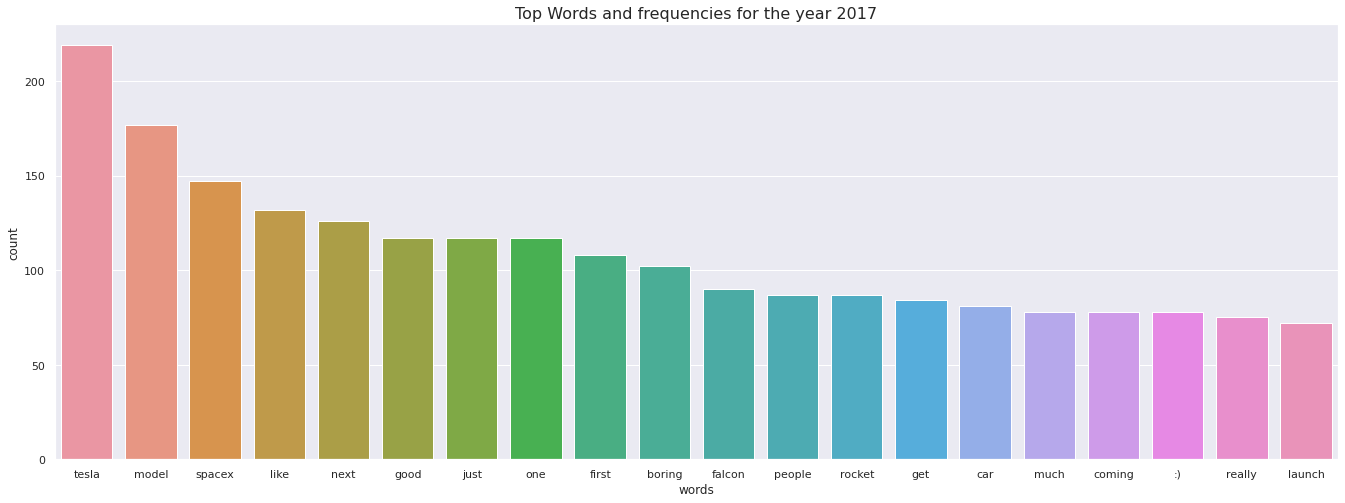



Top 10 word frequnecy per year:  2018
    words  count
0   tesla   1252
1   model    294
2     car    276
3    like    273
4    good    257
5  spacex    249
6   don't    216
7    even    195
8    next    189
9    make    177




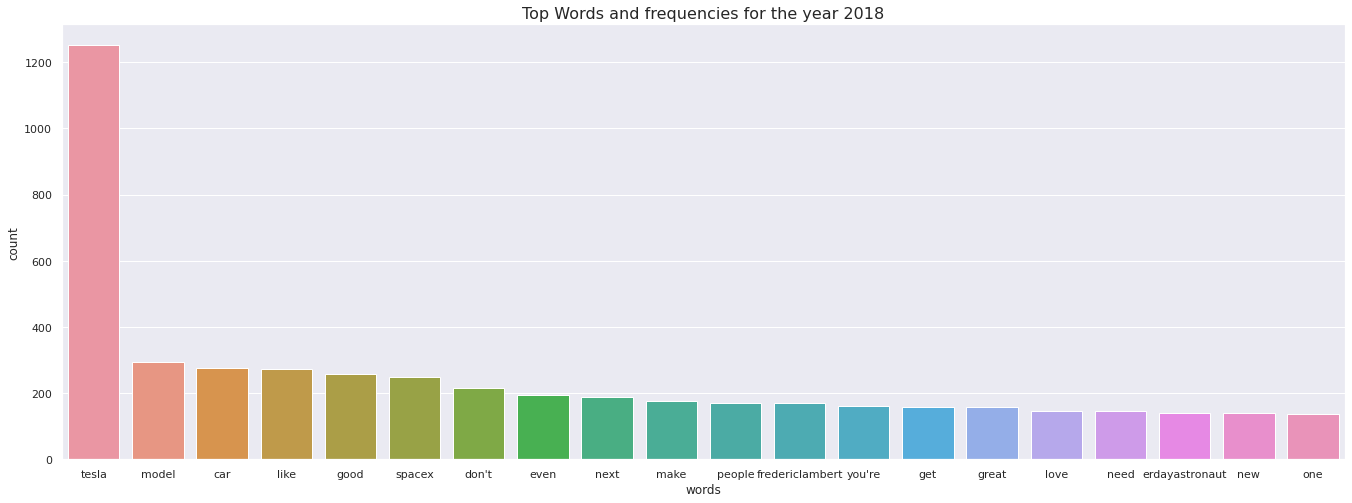



Top 10 word frequnecy per year:  2019
            words  count
0           tesla   1102
1  erdayastronaut    520
2          spacex    411
3         flcnhvy    364
4   teslaownerssv    182
5       teslarati    175
6            like    170
7        starship    160
8           great    149
9            good    147




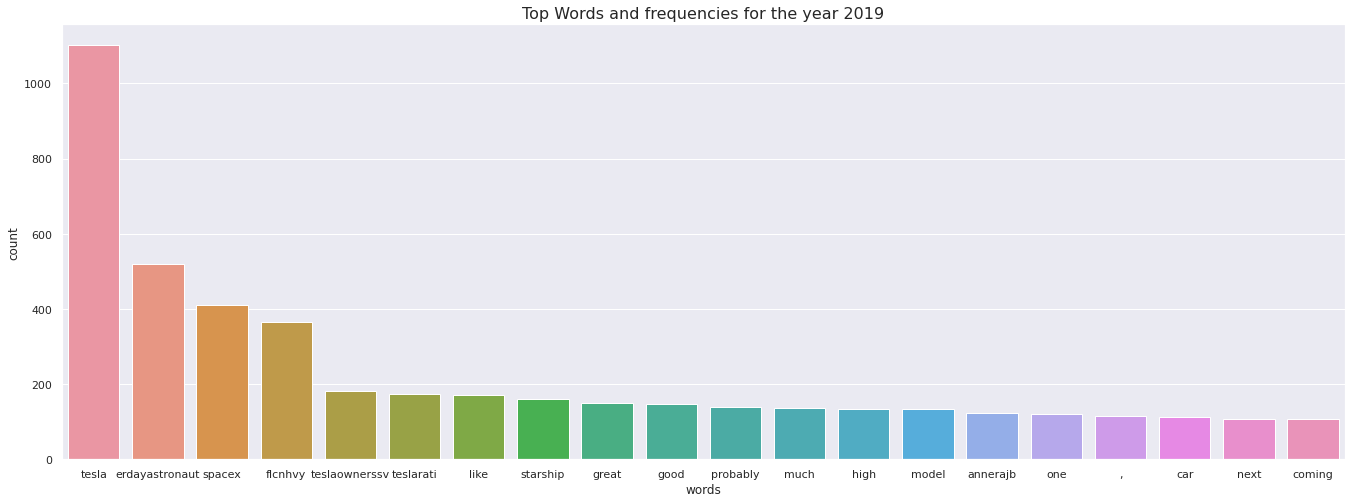



Top 10 word frequnecy per year:  2020
            words  count
0           tesla    322
1  erdayastronaut    247
2         flcnhvy    239
3        ppathole    225
4          spacex    198
5   thirdrowtesla    122
6   teslaownerssv    116
7           great    109
8            much    107
9            good    102




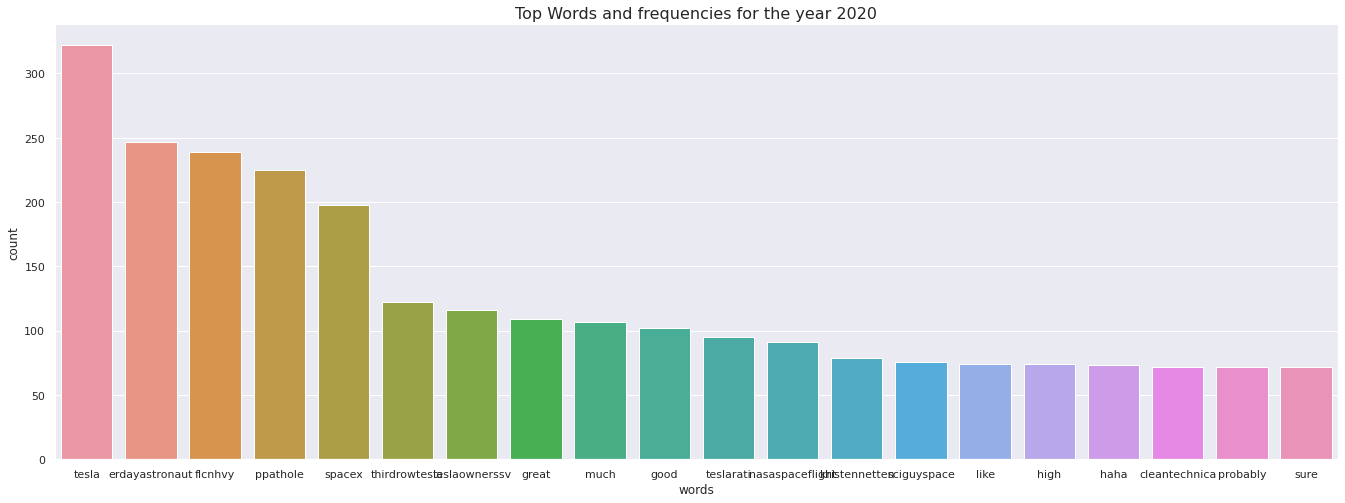



Top 10 word frequnecy per year:  2021
            words  count
0           tesla    306
1          spacex    224
2   wholemarsblog    189
3   teslaownerssv    119
4        ppathole    116
5  erdayastronaut    111
6            much     92
7            good     89
8            like     87
9           great     86




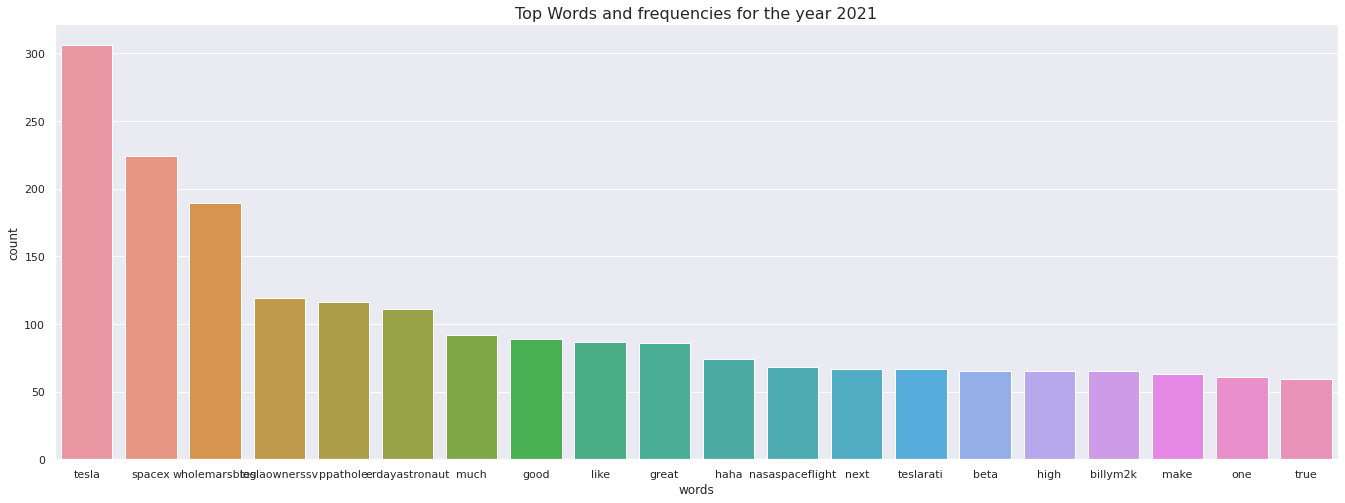



Top 10 word frequnecy per year:  2022
           words  count
0          tesla    100
1  wholemarsblog     84
2         spacex     56
3  teslaownerssv     50
4  sawyermerritt     36
5       billym2k     30
6       starlink     28
7         people     28
8           good     26
9   gailalfaratx     26




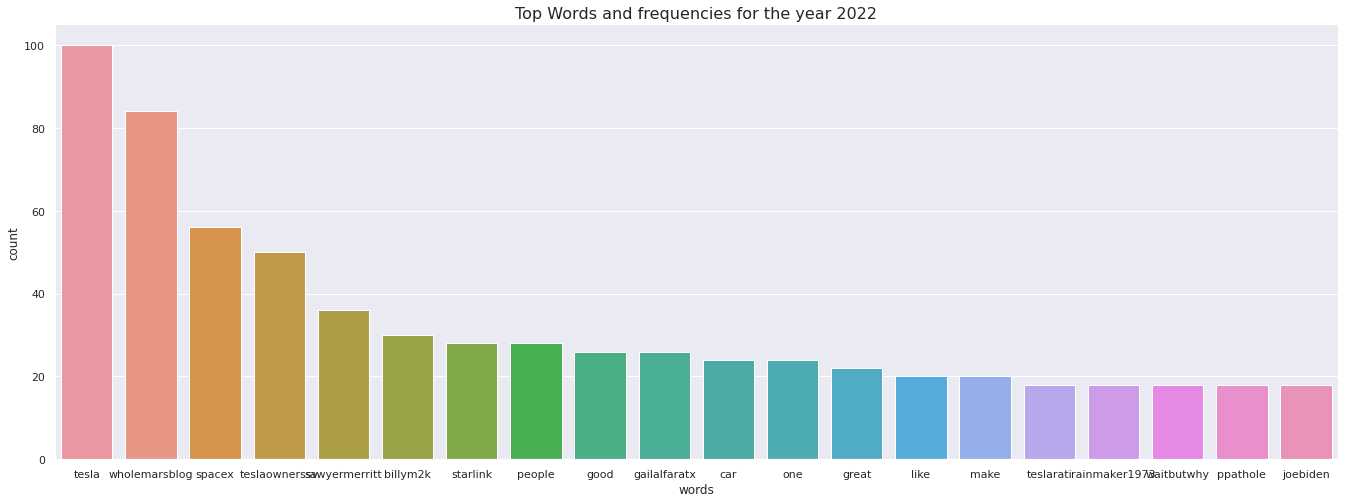

In [140]:
#2. Show top 10 words (for each year) by the highest value of word frequency
for year in years:
  df_tweets_data_year = df_tweets_data[df_tweets_data['year']==year]
  # Calculating the frequency of each word
  res = df_tweets_data_year['tweet_without_stopwords'].str.split(expand=True).stack().value_counts()
  df_word_freq_year = res.to_frame().reset_index()
  df_word_freq_year = df_word_freq_year.rename(columns= {0: 'count'})
  df_word_freq_year = df_word_freq_year.rename(columns= {'index': 'words'})
  print('Top 10 word frequnecy per year: ',year)
  print(df_word_freq_year.head(10))
  print('\n')
  # who v/s fare barplot
  sns.set(rc={"figure.figsize":(23, 8)})
  plt.title(f'Top Words and frequencies for the year {year}', size = 16)
  sns.barplot(x = 'words',y = 'count',data = df_word_freq_year.head(20))
  # Show the plot
  plt.show()
  print('\n')



Ploting histogram of word frequnecy per year:  2017


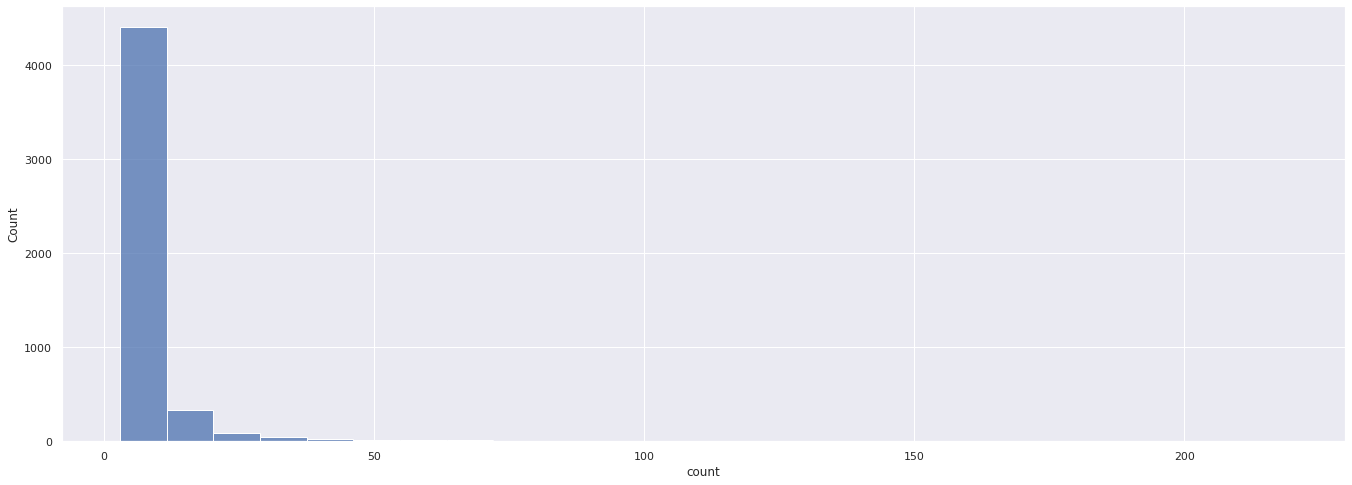





Ploting histogram of word frequnecy per year:  2018


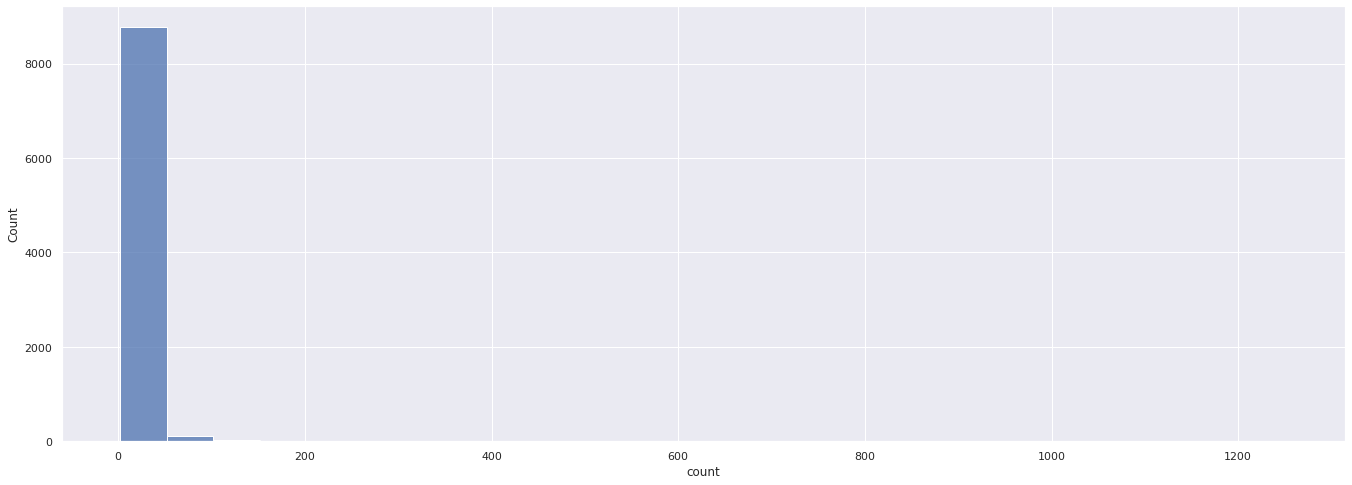





Ploting histogram of word frequnecy per year:  2019


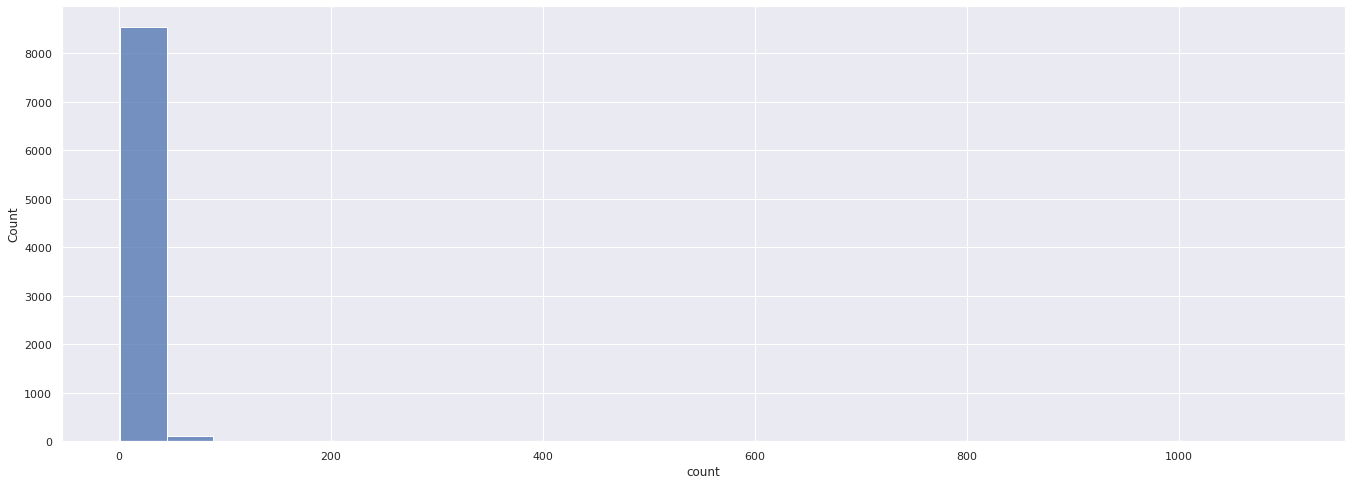





Ploting histogram of word frequnecy per year:  2020


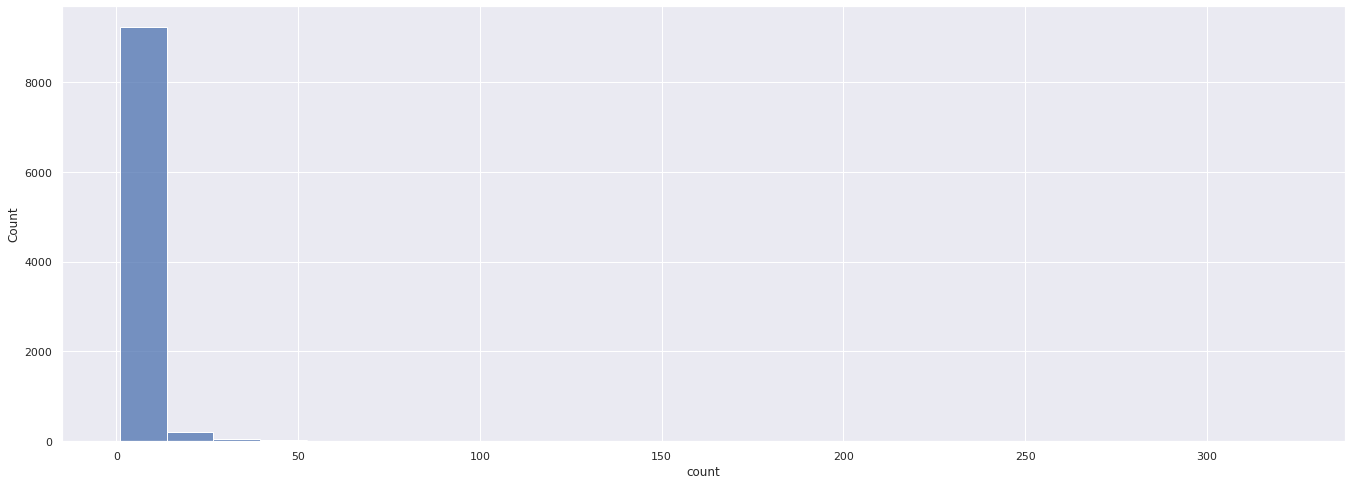





Ploting histogram of word frequnecy per year:  2021


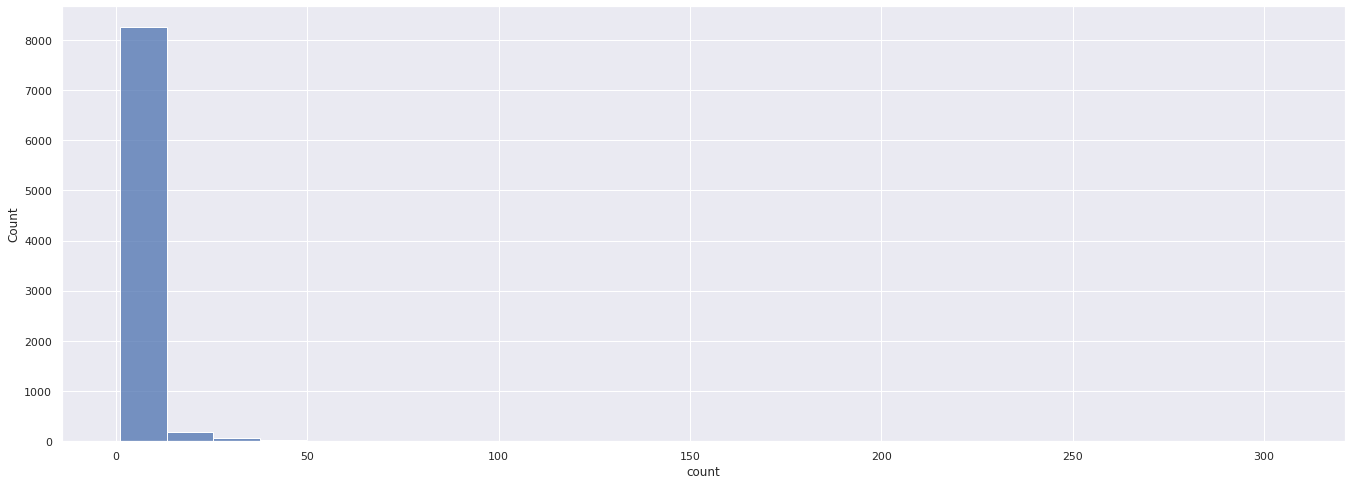





Ploting histogram of word frequnecy per year:  2022


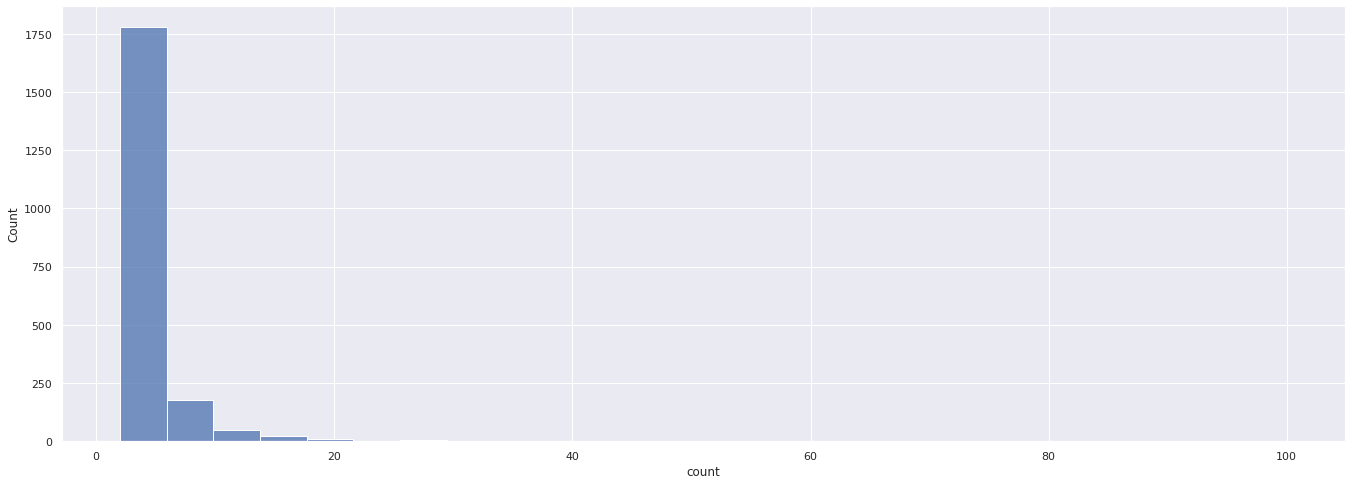

In [217]:
#3. Plot Histogram of word frequencies
for year in years:
  df_tweets_data_year = df_tweets_data[df_tweets_data['year']==year]
  # Calculating the frequency of each word
  res = df_tweets_data_year['tweet_without_stopwords'].str.split(expand=True).stack().value_counts()
  df_word_freq_year = res.to_frame().reset_index()
  df_word_freq_year = df_word_freq_year.rename(columns= {0: 'count'})
  df_word_freq_year = df_word_freq_year.rename(columns= {'index': 'words'})
  print('\n')
  print('Ploting histogram of word frequnecy per year: ',year)
  fig = sns.histplot(df_word_freq_year, x ='count', bins =25)
  plt.show()
  print('\n')



Ploting log-log plots of word frequencies and rank for each year:  2017


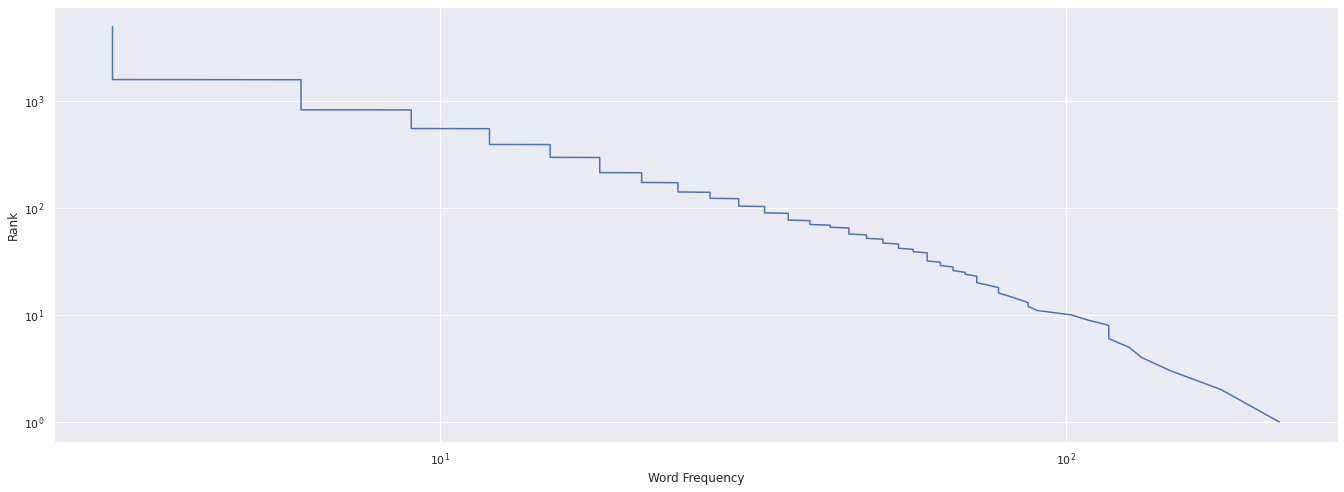



Ploting log-log plots of word frequencies and rank for each year:  2018


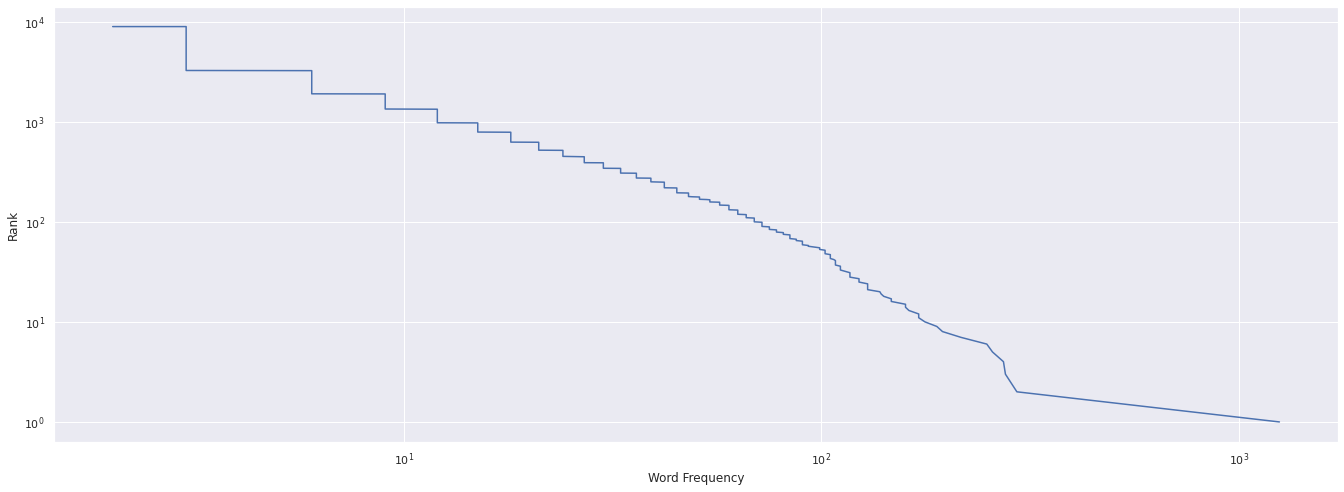



Ploting log-log plots of word frequencies and rank for each year:  2019


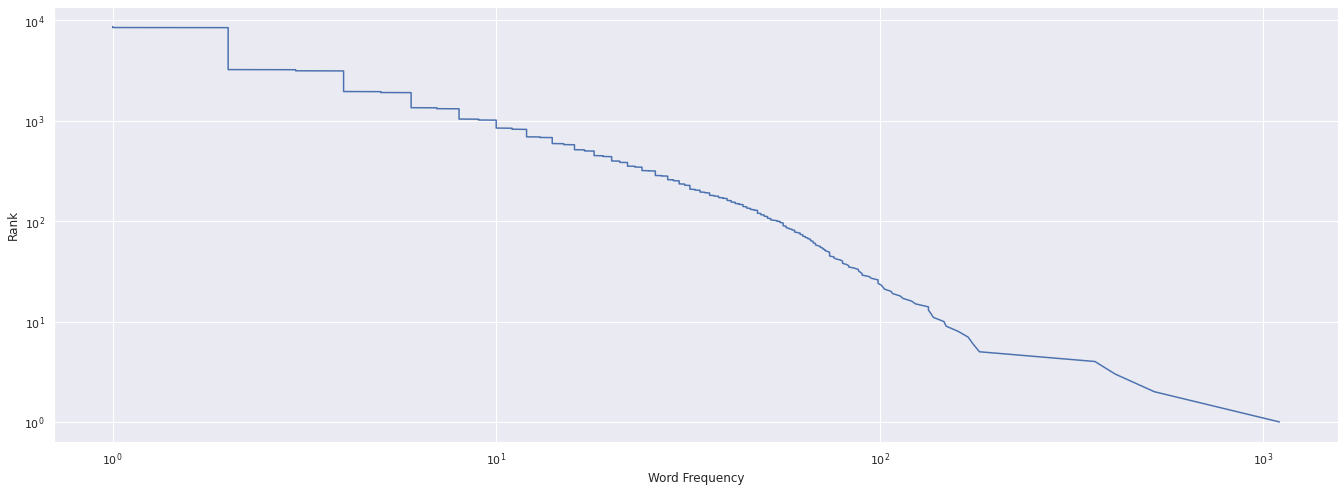



Ploting log-log plots of word frequencies and rank for each year:  2020


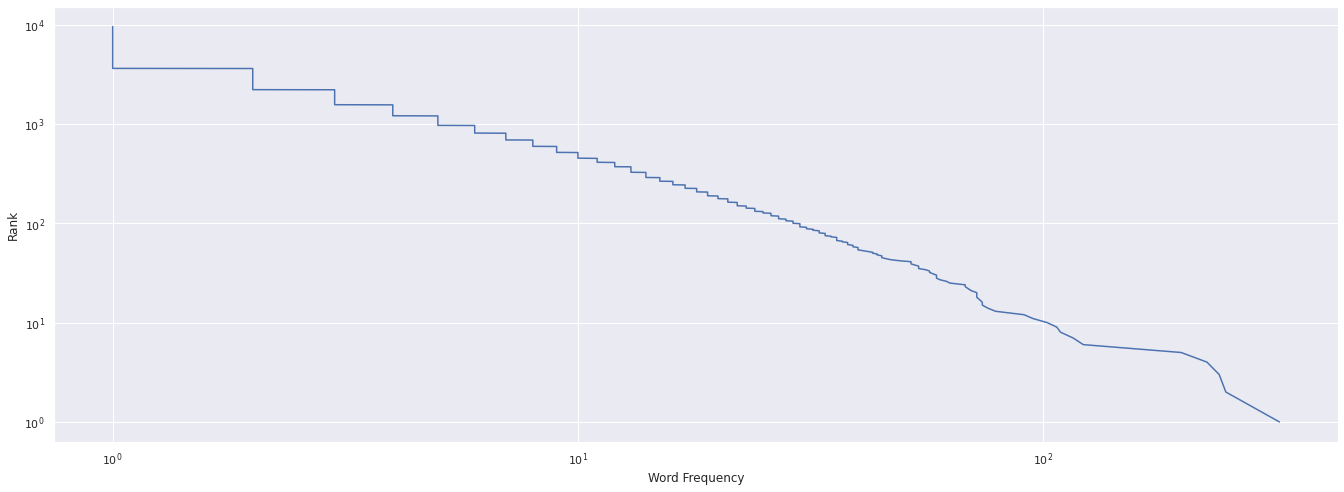



Ploting log-log plots of word frequencies and rank for each year:  2021


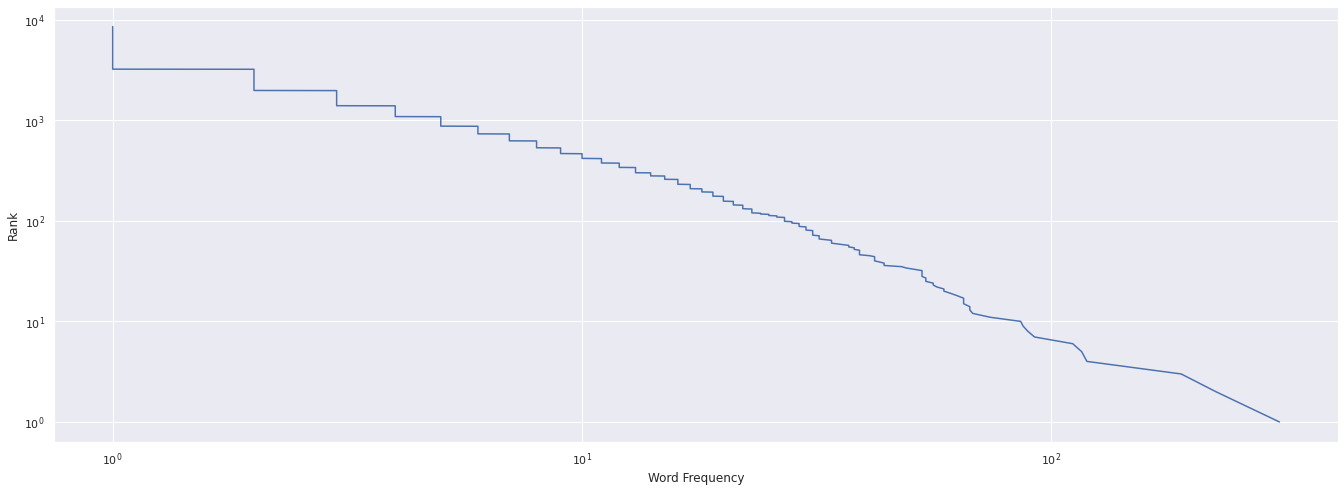



Ploting log-log plots of word frequencies and rank for each year:  2022


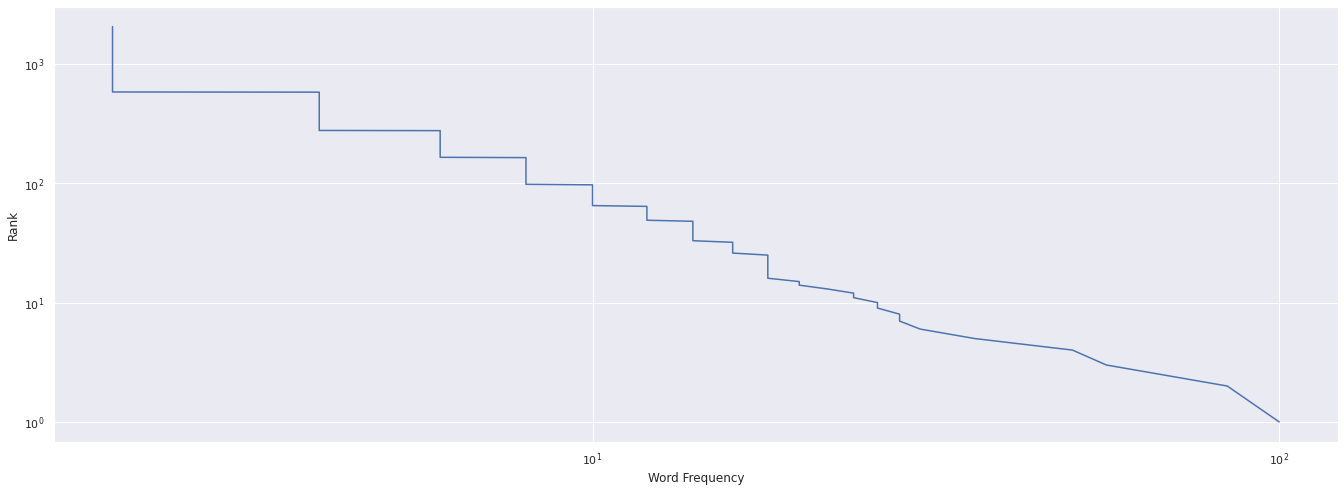

In [142]:
#4. Method-1 Use Zipf's law and plot log-log plots of word frequencies and rank for each year
for year in years:
  df_tweets_data_year = df_tweets_data[df_tweets_data['year']==year]
  # Calculating the frequency of each word
  res = df_tweets_data_year['tweet_without_stopwords'].str.split(expand=True).stack().value_counts()
  df_word_freq_year = res.to_frame().reset_index()
  df_word_freq_year = df_word_freq_year.rename(columns= {0: 'count'})
  df_word_freq_year = df_word_freq_year.rename(columns= {'index': 'words'})
  df_word_freq_year['rank'] = range(1,len(df_word_freq_year)+1)
  print('\n')
  print('Ploting log-log plots of word frequencies and rank for each year: ',year)
  plt.loglog(df_word_freq_year['count'], df_word_freq_year['rank'])
  plt.xlabel('Word Frequency')
  plt.ylabel('Rank')
  plt.show()

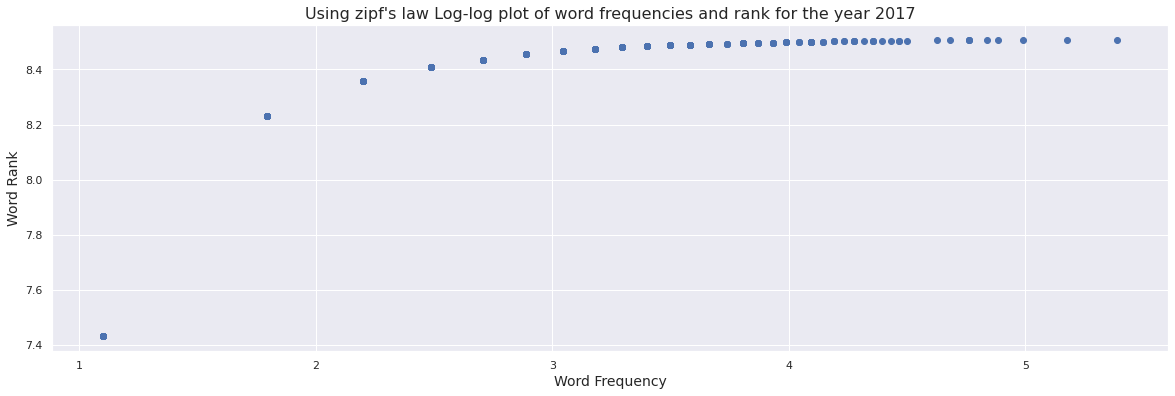

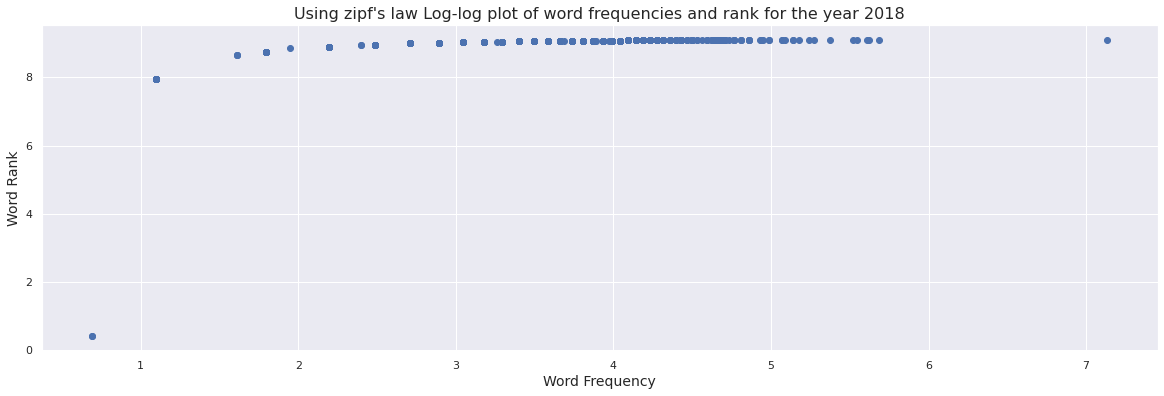

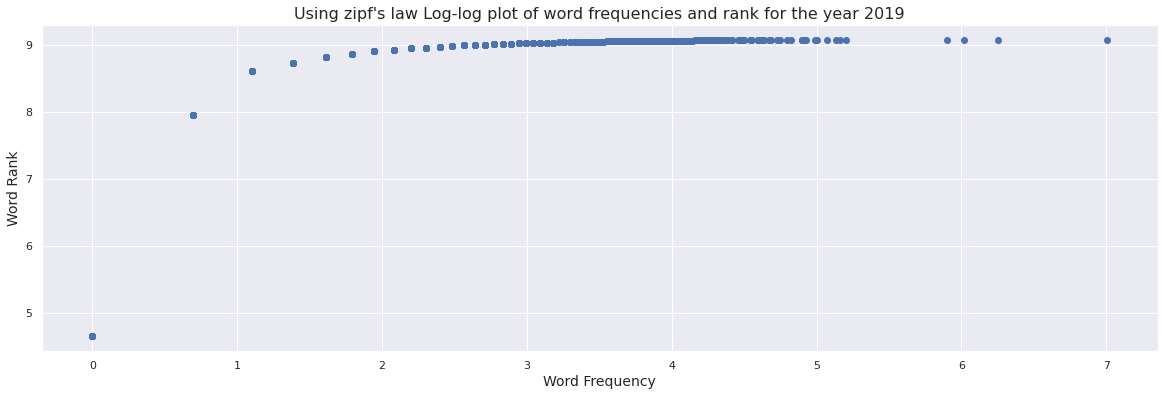

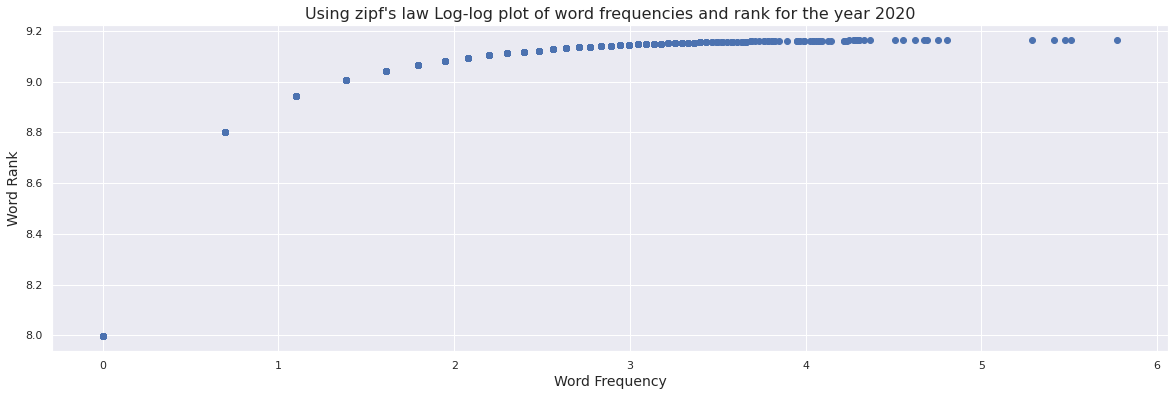

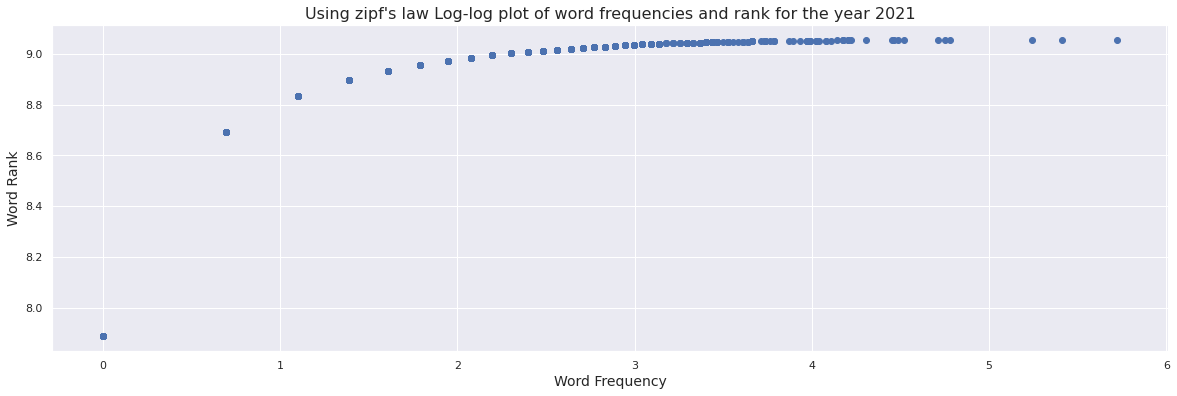

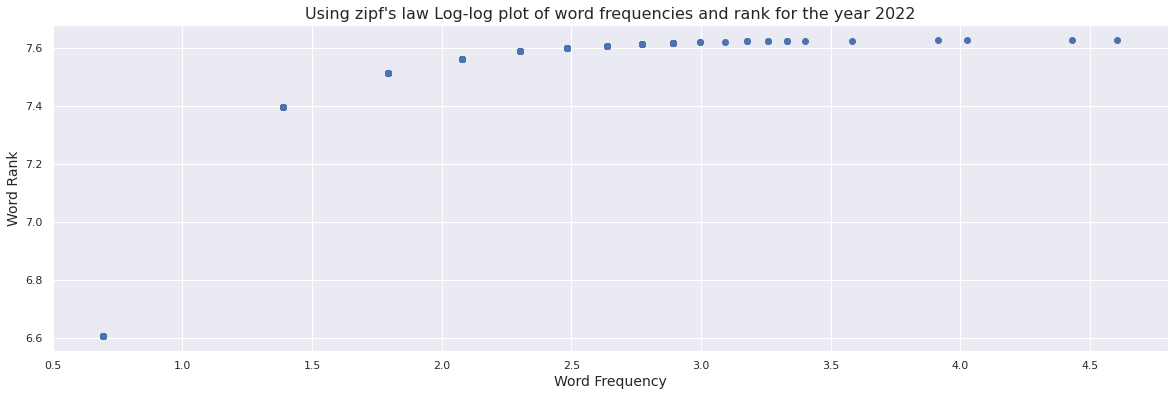

In [143]:
#4. Method-2 Use Zipf's law and plot log-log plots of word frequencies and rank for each year
import scipy.stats as ss
import math
# Show top 10 words (for each year) by the highest value of word frequency
for year in years:
  df_tweets_data_year = df_tweets_data[df_tweets_data['year']==year]
  # Calculating the frequency of each word
  res = df_tweets_data_year['tweet_without_stopwords'].str.split(expand=True).stack().value_counts()
  df_word_freq_year = res.to_frame().reset_index()
  df_word_freq_year = df_word_freq_year.rename(columns= {0: 'count'})
  df_word_freq_year = df_word_freq_year.rename(columns= {'index': 'words'})
  rank_word = ss.rankdata([freq for freq in df_word_freq_year['count'].values.tolist()])
  frequencies = [math.log(freq) for freq in df_word_freq_year['count'].values.tolist()]
  rank = [math.log(rank) for rank in rank_word]
  fig, ax = plt.subplots(figsize = (20,6))
  plt.plot(frequencies, rank, 'bo')
  print('\n')
  plt.title(f"Using zipf's law Log-log plot of word frequencies and rank for the year {year}", size = 16)
  plt.xlabel('Word Frequency', size = 14)
  plt.ylabel('Word Rank', size = 14)
  plt.show()
  print('\n')

Bigram network graphs for each year 2017
               bigram  count
0              (i, m)     60
1      (coming, soon)     45
2     (falcon, heavy)     45
3          (model, s)     45
4            (can, t)     42
5   (boring, company)     39
6         (falcon, 9)     36
7            (don, t)     36
8             (i, ve)     33
9        (next, year)     30
10      (good, point)     27
11          (you, re)     24
12         (model, x)     24
13       (next, week)     24
14      (next, month)     21


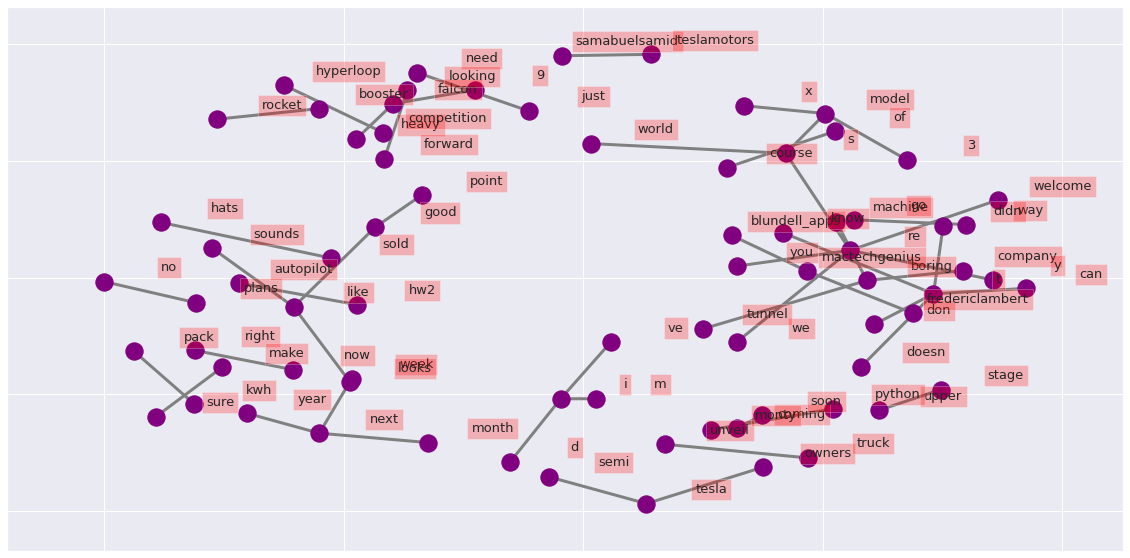



Bigram network graphs for each year 2018
               bigram  count
0              (i, m)     60
1      (coming, soon)     45
2     (falcon, heavy)     45
3          (model, s)     45
4            (can, t)     42
5   (boring, company)     39
6         (falcon, 9)     36
7            (don, t)     36
8             (i, ve)     33
9        (next, year)     30
10      (good, point)     27
11          (you, re)     24
12         (model, x)     24
13       (next, week)     24
14      (next, month)     21


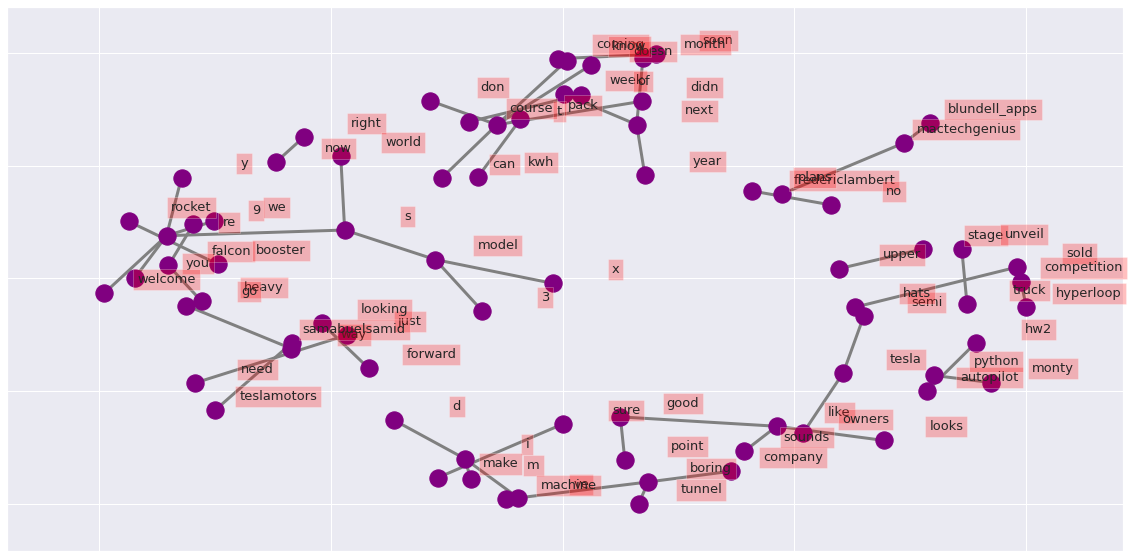



Bigram network graphs for each year 2019
               bigram  count
0              (i, m)     60
1      (coming, soon)     45
2     (falcon, heavy)     45
3          (model, s)     45
4            (can, t)     42
5   (boring, company)     39
6         (falcon, 9)     36
7            (don, t)     36
8             (i, ve)     33
9        (next, year)     30
10      (good, point)     27
11          (you, re)     24
12         (model, x)     24
13       (next, week)     24
14      (next, month)     21


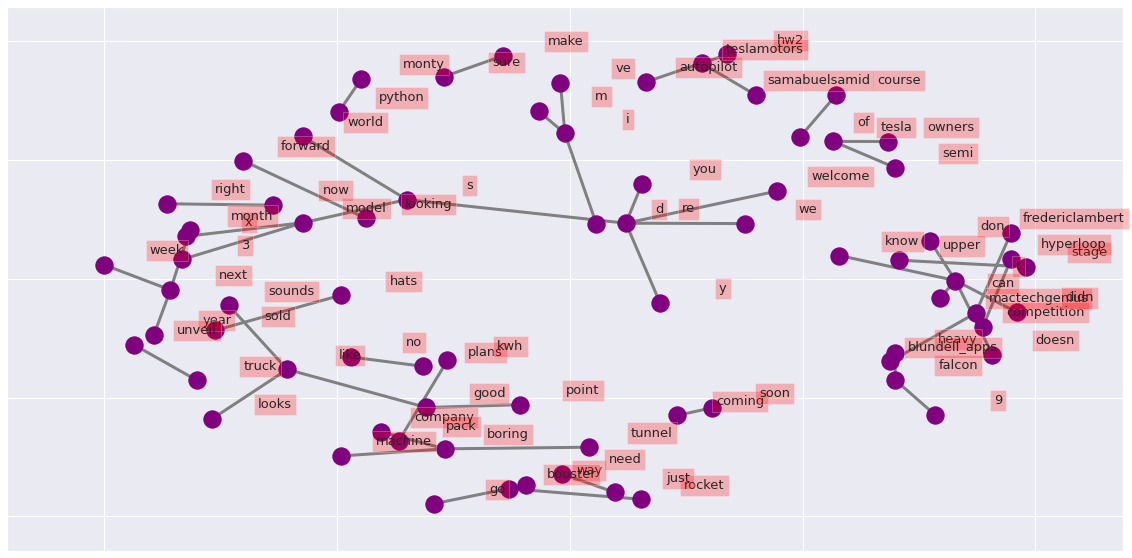



Bigram network graphs for each year 2020
               bigram  count
0              (i, m)     60
1      (coming, soon)     45
2     (falcon, heavy)     45
3          (model, s)     45
4            (can, t)     42
5   (boring, company)     39
6         (falcon, 9)     36
7            (don, t)     36
8             (i, ve)     33
9        (next, year)     30
10      (good, point)     27
11          (you, re)     24
12         (model, x)     24
13       (next, week)     24
14      (next, month)     21


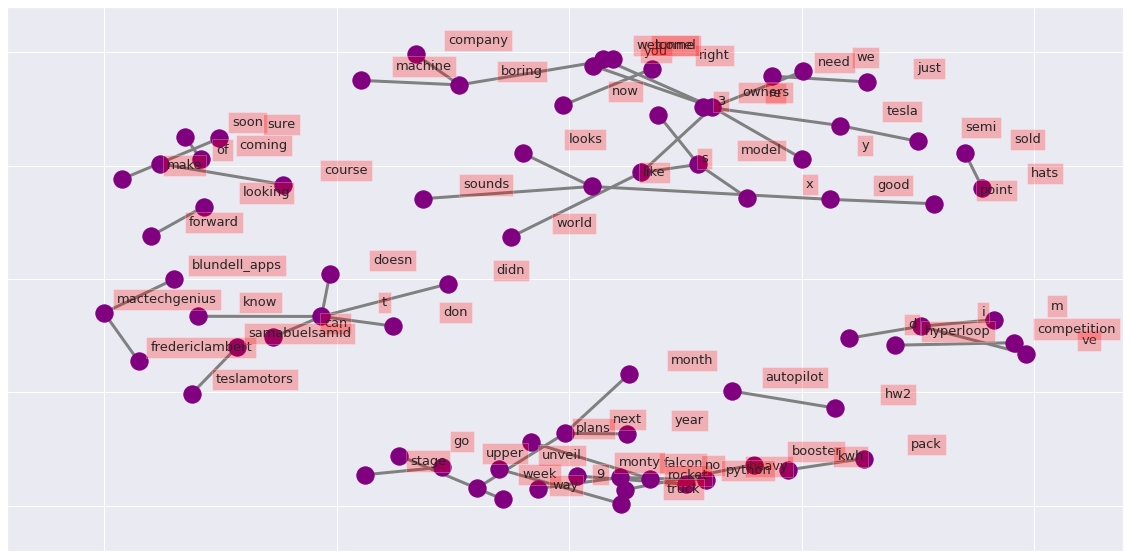



Bigram network graphs for each year 2021
               bigram  count
0              (i, m)     60
1      (coming, soon)     45
2     (falcon, heavy)     45
3          (model, s)     45
4            (can, t)     42
5   (boring, company)     39
6         (falcon, 9)     36
7            (don, t)     36
8             (i, ve)     33
9        (next, year)     30
10      (good, point)     27
11          (you, re)     24
12         (model, x)     24
13       (next, week)     24
14      (next, month)     21


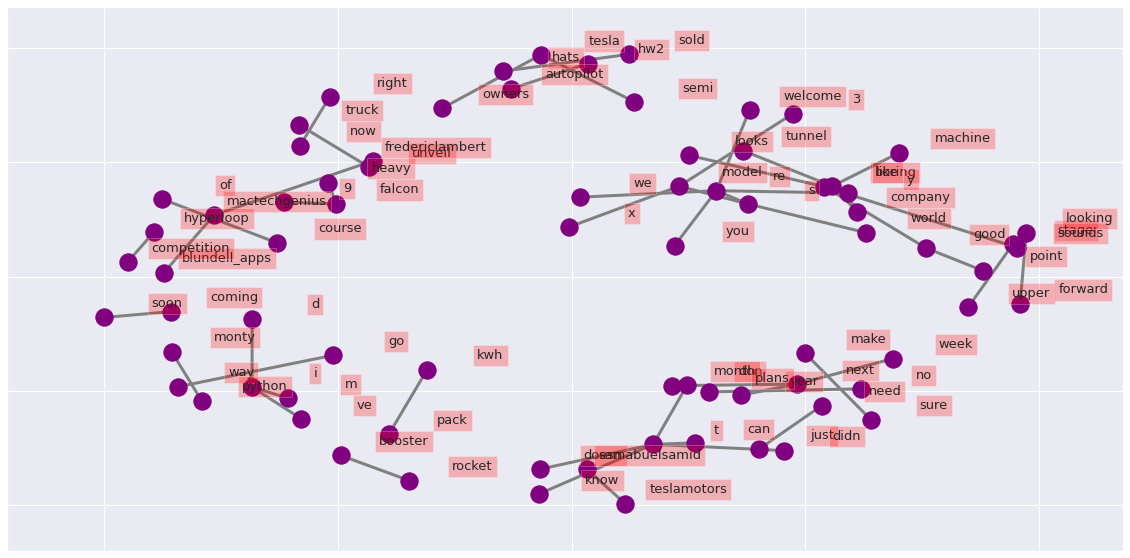



Bigram network graphs for each year 2022
               bigram  count
0              (i, m)     60
1      (coming, soon)     45
2     (falcon, heavy)     45
3          (model, s)     45
4            (can, t)     42
5   (boring, company)     39
6         (falcon, 9)     36
7            (don, t)     36
8             (i, ve)     33
9        (next, year)     30
10      (good, point)     27
11          (you, re)     24
12         (model, x)     24
13       (next, week)     24
14      (next, month)     21


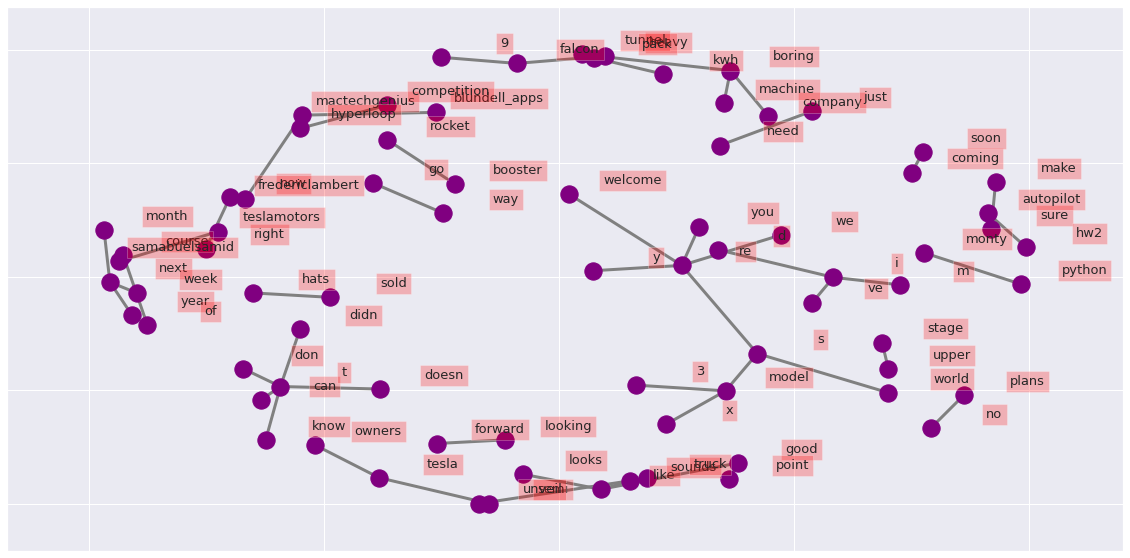

In [214]:
#5. Method-1  Create bigram network graphs for each year
import nltk
from nltk import bigrams
import itertools
import collections
# Assuming your dataframe is called df and it has a column called 'text'
from nltk.tokenize import RegexpTokenizer
def tokenize_text(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    # tokens = nltk.word_tokenize(text)
    return tokens

for year in years:
  df_tweets_data_year = df_tweets_data[df_tweets_data['year']==2017]
  df_tweets_data_year['tokens'] = df_tweets_data_year['tweet_without_stopwords'].apply(tokenize_text)
  df_tweets_data_year['tokens']
  bigrams_list = [list(nltk.bigrams(tokens)) for tokens in df_tweets_data_year['tokens']]
  # Flatten list of bigrams in clean tweets
  bigrams = list(itertools.chain(*bigrams_list))
  # Create counter of words in clean bigrams
  bigram_counts = collections.Counter(bigrams)
  bigram_counts.most_common(50)
  bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                              columns=['bigram', 'count'])
  
  # Create dictionary of bigrams and their counts
  d = bigram_df.set_index('bigram').T.to_dict('records')
  print(f"Bigram network graphs for each year {year}")
  print(bigram_df.head(15))
  # Create network plot 
  G = nx.Graph()

  # Create connections between nodes
  for k, v in d[0].items():
      G.add_edge(k[0], k[1], weight=(v * 10))

  G.add_node("tesla", weight=100)
  fig, ax = plt.subplots(figsize=(20, 10))

  pos = nx.spring_layout(G, k=2)

  # Plot networks
  nx.draw_networkx(G, pos,
                  font_size=16,
                  width=3,
                  edge_color='grey',
                  node_color='purple',
                  with_labels = False,
                  ax=ax)

  # Create offset labels
  for key, value in pos.items():
      x, y = value[0]+.135, value[1]+.045
      ax.text(x, y,
              s=key,
              bbox=dict(facecolor='red', alpha=0.25),
              horizontalalignment='center', fontsize=13)
  # nx.draw(G, pos=pos, with_labels=True, node_size=500, font_size=12, width=[bigram_df['count']*0.1 for (u,v,d) in G.edges(data=True)])
  # nx.draw_networkx_edge_labels(G, pos=pos, font_size=8)
  plt.show()
  print('\n')

Bigram network graphs for each year 2017




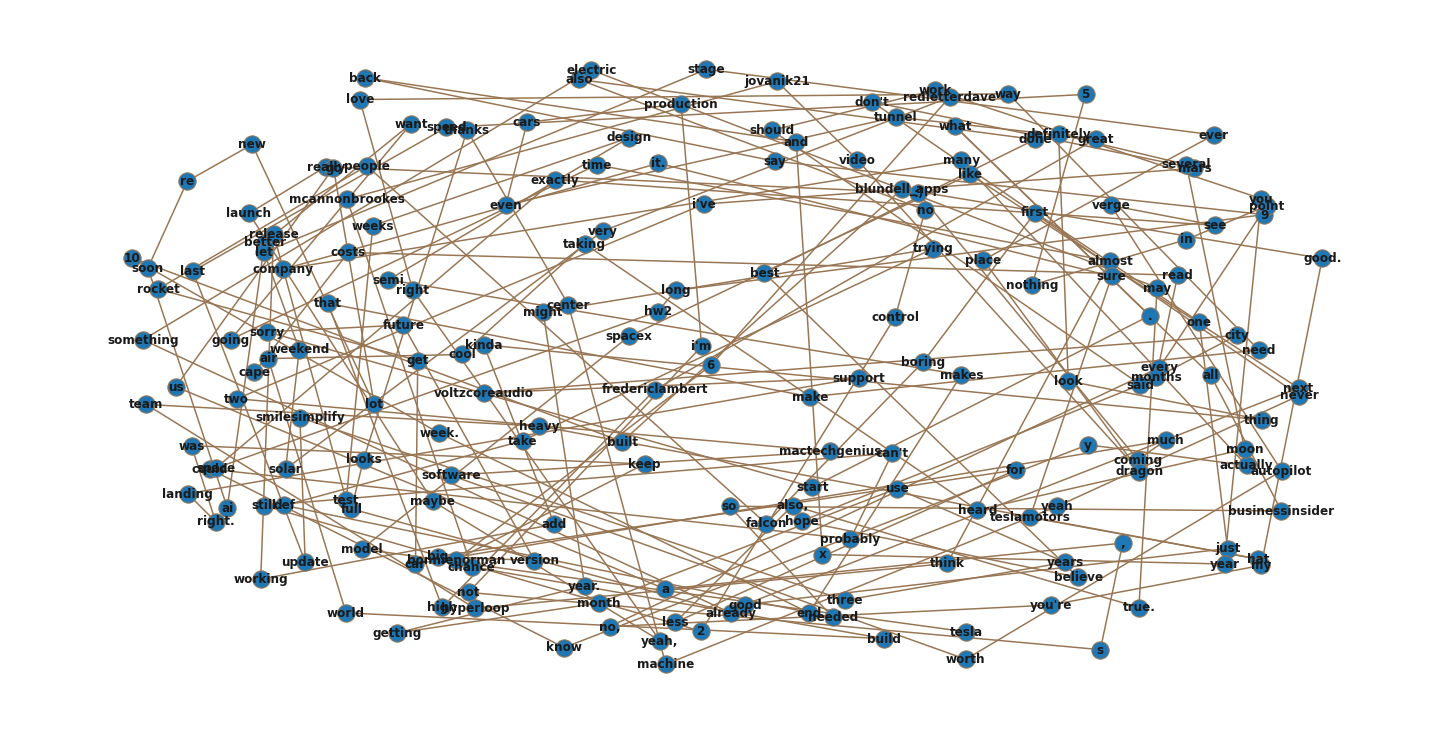



Bigram network graphs for each year 2018




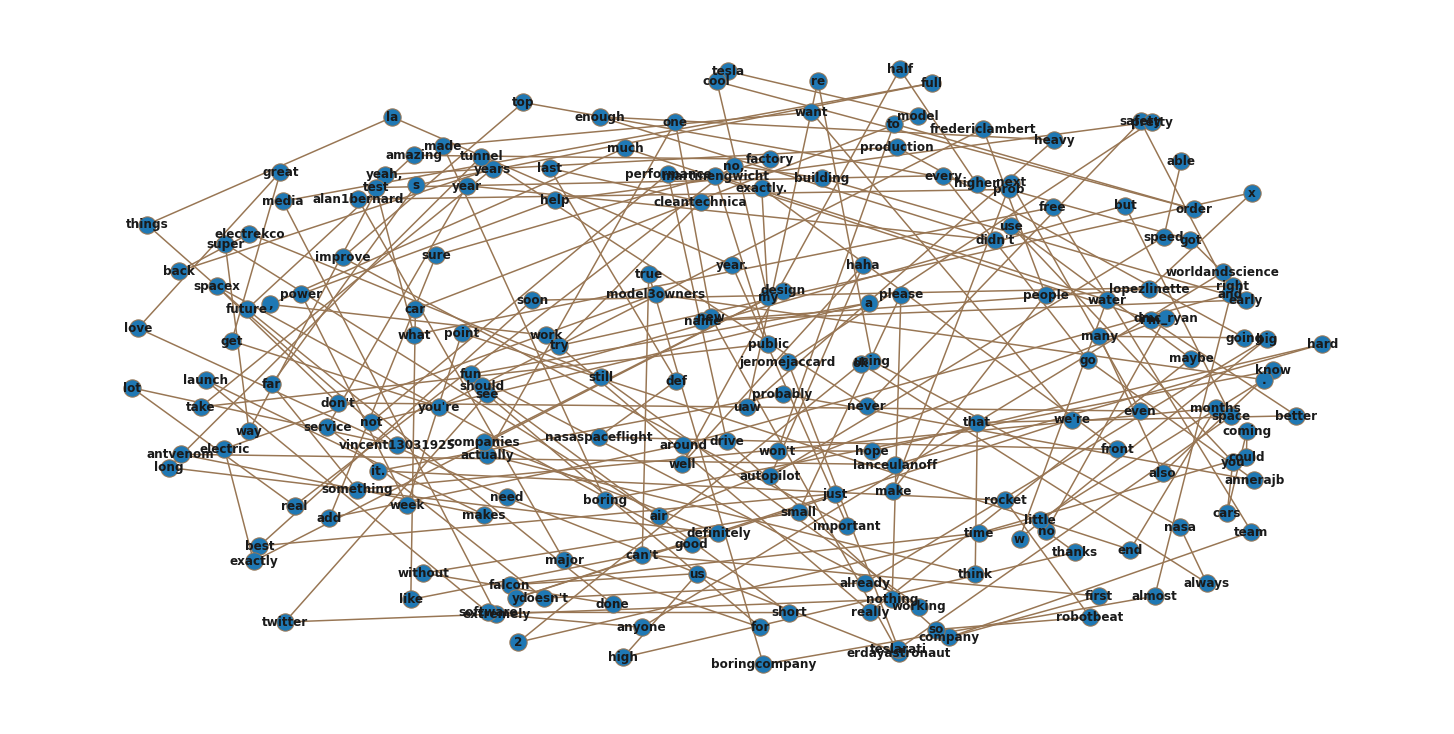



Bigram network graphs for each year 2019




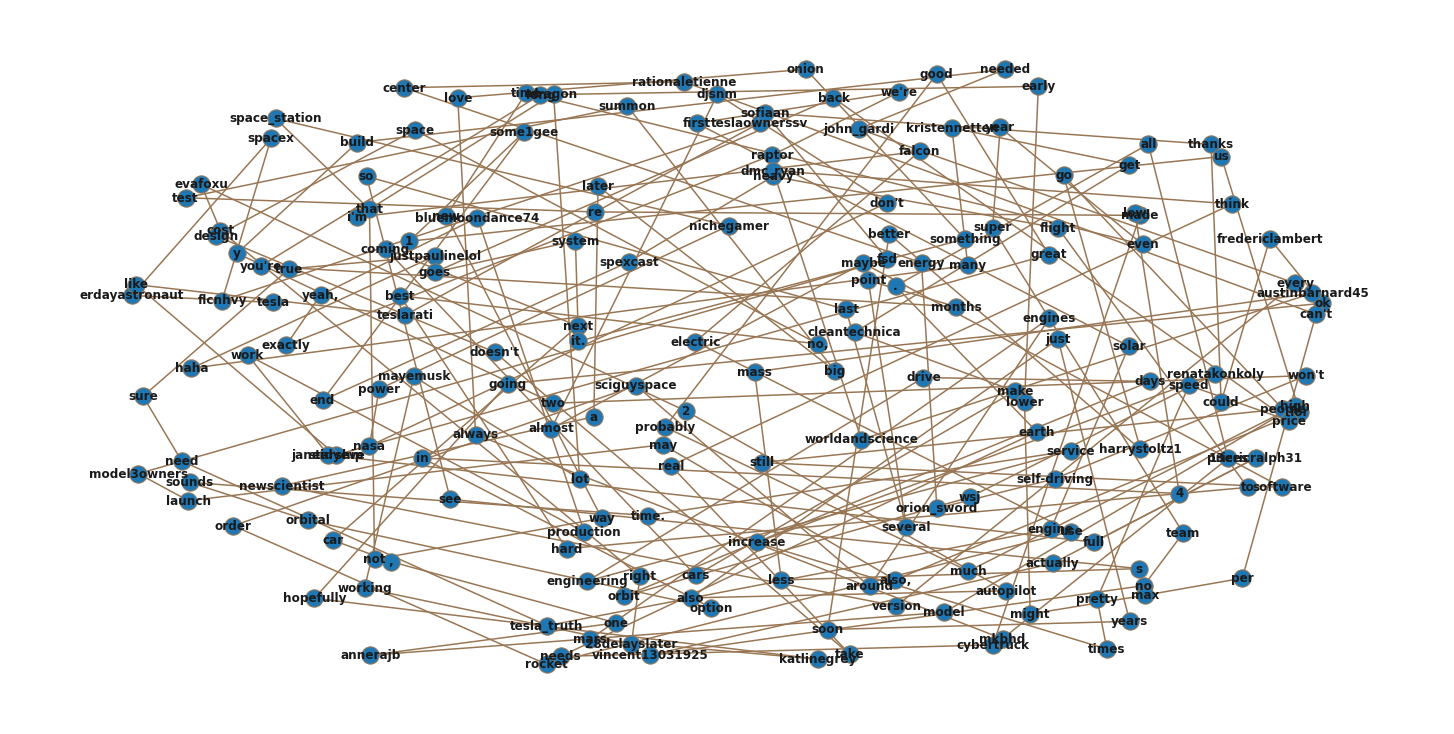



Bigram network graphs for each year 2020




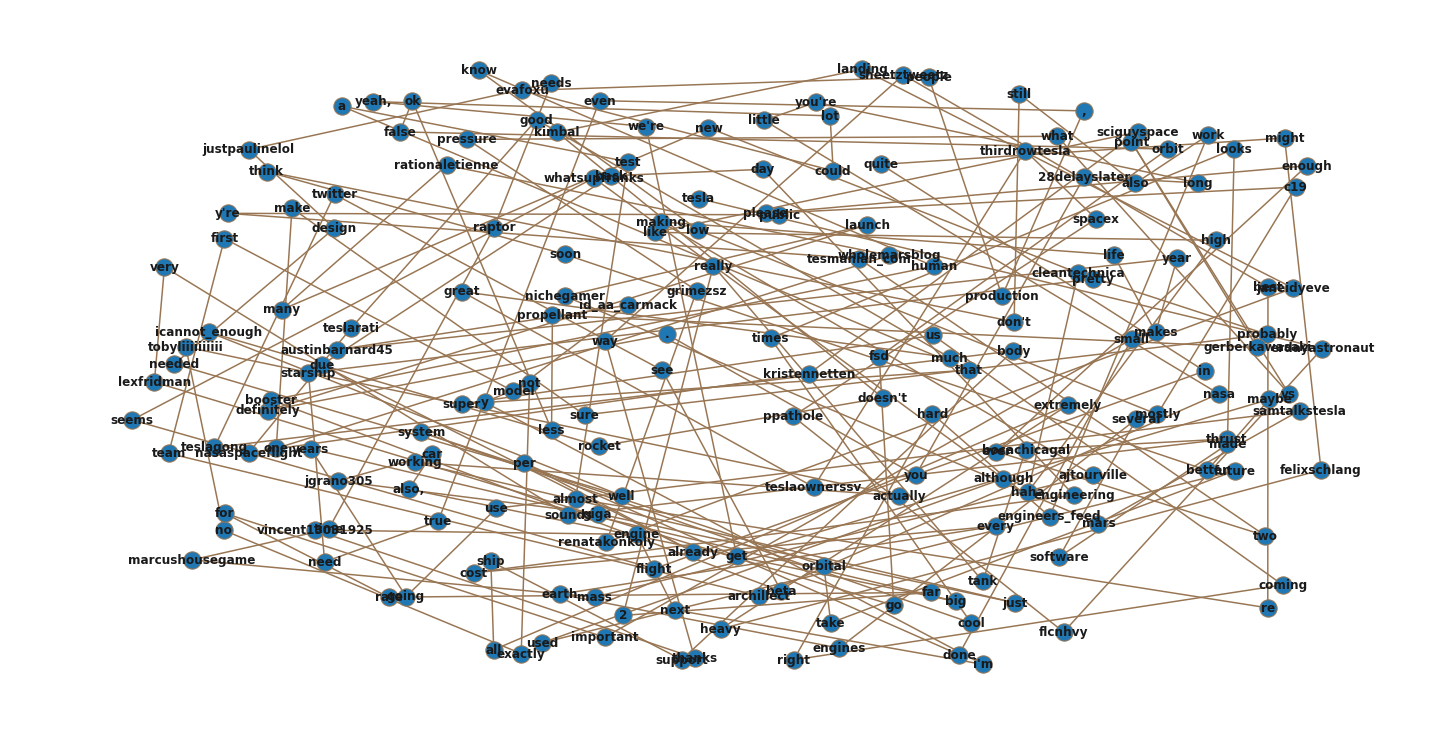



Bigram network graphs for each year 2021




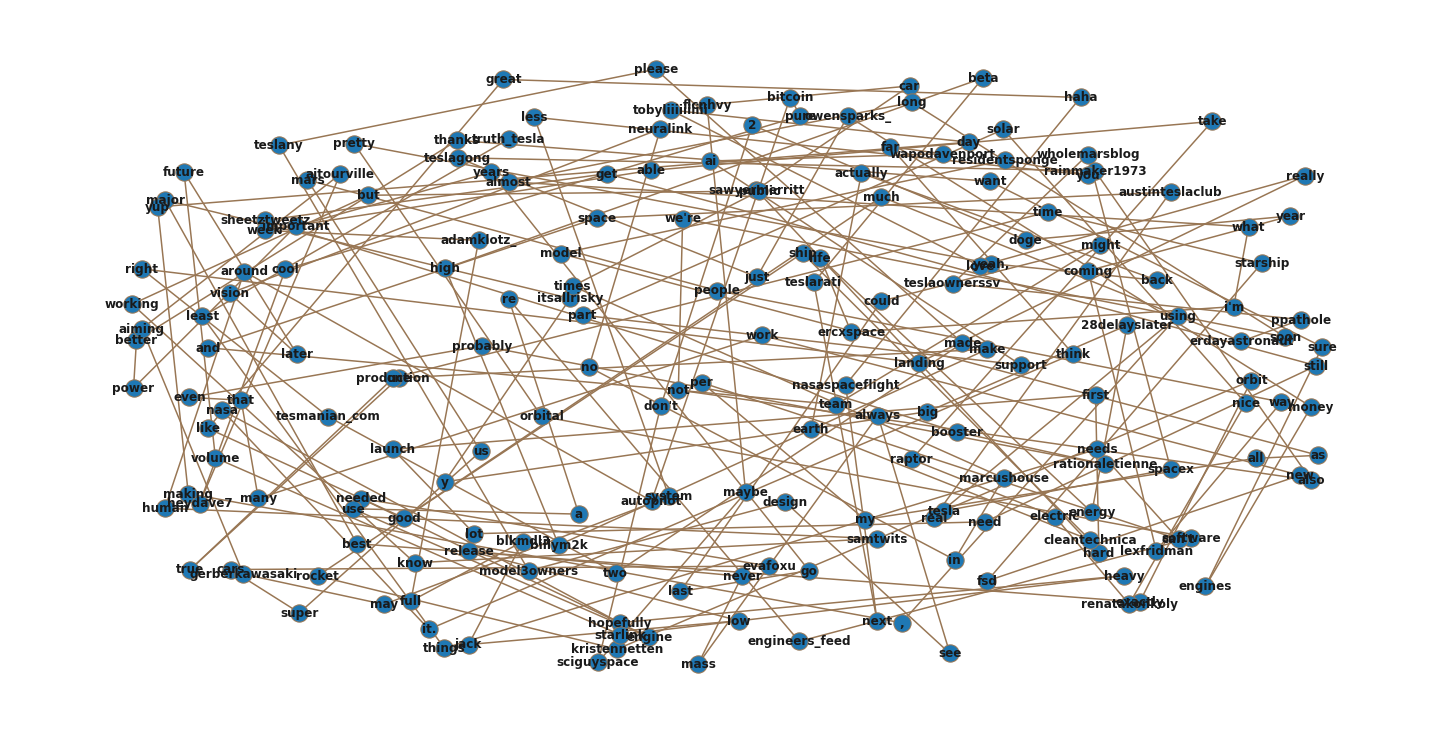



Bigram network graphs for each year 2022




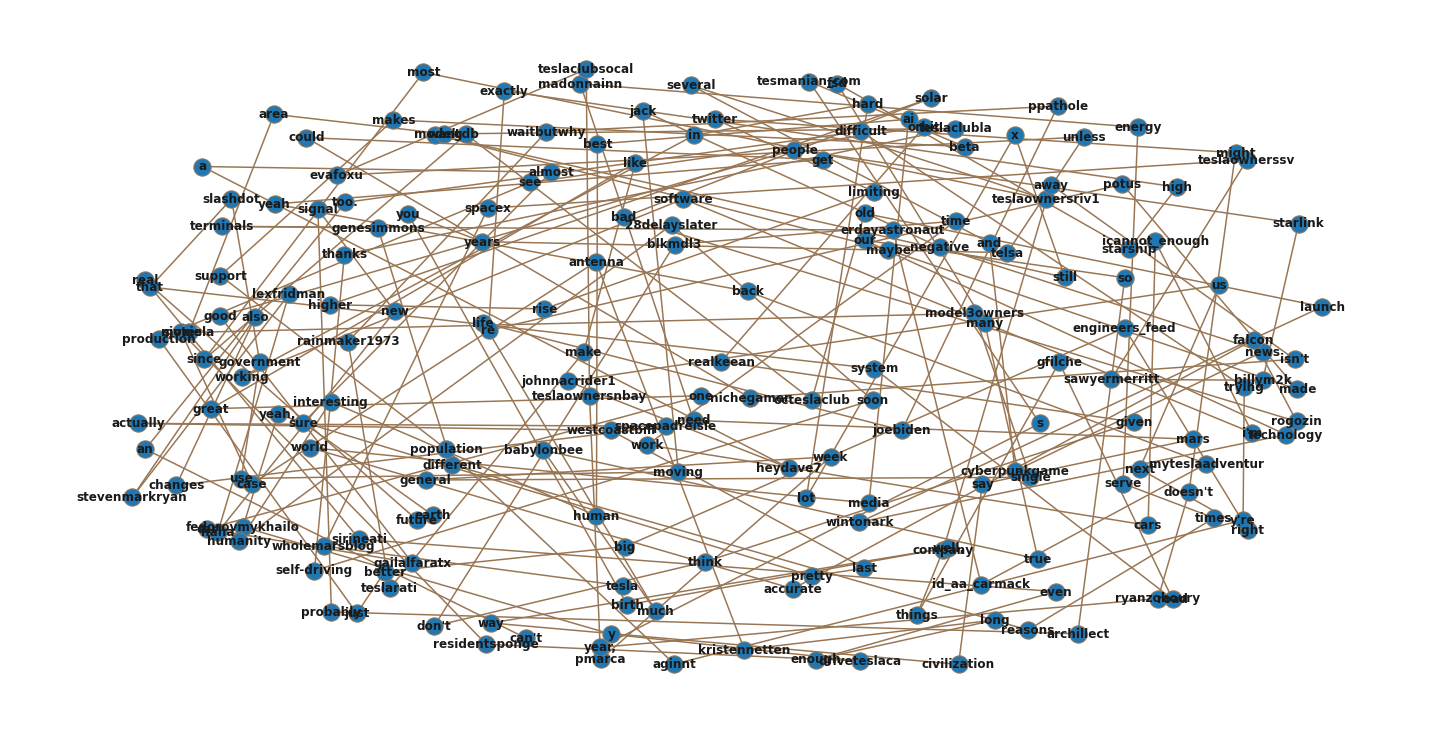

In [144]:
#5. Method-2  Create bigram network graphs for each year
#In order to reduce the execution time I have taken only 200 elements for the plots
for year in years:
  df_tweets_data_year = df_tweets_data[df_tweets_data['year']==year]
  # Calculating the frequency of each word
  res = df_tweets_data_year['tweet_without_stopwords'].str.split(expand=True).stack().value_counts()
  df_word_freq_year = res.to_frame().reset_index()
  df_word_freq_year = df_word_freq_year.rename(columns= {0: 'count'})
  df_word_freq_year = df_word_freq_year.rename(columns= {'index': 'words'})
  bi_words = list(nltk.bigrams(df_word_freq_year.words))
  bi_analysis = nltk.FreqDist(bi_words[:200])
  print(f"Bigram network graphs for each year {year}")
  print('\n')
  Net_Graph = nx.Graph()
  for index, row in bi_analysis.most_common():
    Net_Graph.add_weighted_edges_from([(index[0], index[1], row)])  
  plt.figure(figsize=(20,10))
  options = {
      'edge_color': '#987654',
      'width': 1.5,
      'with_labels': True,
      'font_weight': 'bold',
  }

  nx.draw(Net_Graph, pos=nx.spring_layout(Net_Graph, k=0.25, iterations=10), **options)
  axes = plt.gca()
  axes.collections[0].set_edgecolor("#987654") 
  plt.show()
  print('\n')

In [220]:
#Additional Analysis of tweets 
# Drop rows that has NaN values on selected columns
df_cleaned_likes=df_tweets_data.dropna(subset=['nlikes','nreplies','nretweets'])
df_cleaned_likes.drop(columns=['language','username','tweet_without_stopwords'],inplace=True)
df_cleaned_likes.drop_duplicates(subset=['tweet'],inplace=True)

#Plotting the bar garph to visualize the top liked tweets based on year 2017
df_cleaned_likes_1 = df_cleaned_likes[df_cleaned_likes['year']==2017]
sorted_df = df_cleaned_likes_1.sort_values(by=['nlikes'],ascending=False)
top_20_df = sorted_df.iloc[:20]
print('\n')
fig = px.bar(top_20_df, x='tweet', y='nlikes',title="Top likes for tweets in each year 2017")
fig.update_layout(
    xaxis = {
     'tickmode': 'array',
     'tickvals': list(range(len(top_20_df))),
     'ticktext': top_20_df['tweet'].str.slice(-30).tolist(),
    }
)
fig.show()

In [147]:
# Drop rows that has NaN values on selected columns
df_cleaned_likes=df_tweets_data.dropna(subset=['nlikes','nreplies','nretweets'])
df_cleaned_likes.drop(columns=['language','username','tweet_without_stopwords'],inplace=True)
df_cleaned_likes.drop_duplicates(subset=['tweet'],inplace=True)
#Plotting the bar garph to visualize the top liked tweets based on year 2018
df_cleaned_likes_2 = df_cleaned_likes[df_cleaned_likes['year']==2018]
sorted_df = df_cleaned_likes_2.sort_values(by=['nlikes'],ascending=False)
top_20_df = sorted_df.iloc[:20]
print('\n')
fig = px.bar(top_20_df, x='tweet', y='nlikes',title="Top likes for tweets in each year 2018")
fig.update_layout(
    xaxis = {
     'tickmode': 'array',
     'tickvals': list(range(len(top_20_df))),
     'ticktext': top_20_df['tweet'].str.slice(-30).tolist(),
    }
)
fig.show()

In [148]:
# Drop rows that has NaN values on selected columns
df_cleaned_likes=df_tweets_data.dropna(subset=['nlikes','nreplies','nretweets'])
df_cleaned_likes.drop(columns=['language','username','tweet_without_stopwords'],inplace=True)
df_cleaned_likes.drop_duplicates(subset=['tweet'],inplace=True)
#Plotting the bar garph to visualize the top liked tweets based on year 2019
df_cleaned_likes_3 = df_cleaned_likes[df_cleaned_likes['year']==2019]
sorted_df = df_cleaned_likes_3.sort_values(by=['nlikes'],ascending=False)
top_20_df = sorted_df.iloc[:20]
print('\n')
fig = px.bar(top_20_df, x='tweet', y='nlikes',title="Top likes for tweets in each year 2019")
fig.update_layout(
    xaxis = {
     'tickmode': 'array',
     'tickvals': list(range(len(top_20_df))),
     'ticktext': top_20_df['tweet'].str.slice(-30).tolist(),
    }
)
fig.show()

In [149]:
# Drop rows that has NaN values on selected columns
df_cleaned_likes=df_tweets_data.dropna(subset=['nlikes','nreplies','nretweets'])
df_cleaned_likes.drop(columns=['language','username','tweet_without_stopwords'],inplace=True)
df_cleaned_likes.drop_duplicates(subset=['tweet'],inplace=True)
#Plotting the bar garph to visualize the top liked tweets based on year 2020
df_cleaned_likes_4 = df_cleaned_likes[df_cleaned_likes['year']==2020]
sorted_df = df_cleaned_likes_4.sort_values(by=['nlikes'],ascending=False)
top_20_df = sorted_df.iloc[:20]
print('\n')
fig = px.bar(top_20_df, x='tweet', y='nlikes',title="Top likes for tweets in each year 2020")
fig.update_layout(
    xaxis = {
     'tickmode': 'array',
     'tickvals': list(range(len(top_20_df))),
     'ticktext': top_20_df['tweet'].str.slice(-30).tolist(),
    }
)
fig.show()

In [ ]:
!pwd
%cd /content
!pwd
!jupyter nbconvert --to html 'Project_3_group_16.ipynb'